<a href="https://colab.research.google.com/github/KatyaAB-125/primerRepo/blob/main/CASO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Data Set 

Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de incumplimiento estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Debido a que se desconoce la probabilidad real de incumplimiento, este estudio presentó el novedoso "Método de suavizado de clasificación" para estimar la probabilidad real de incumplimiento. Con la probabilidad real de incumplimiento como variable de respuesta (Y) y la probabilidad predictiva de incumplimiento como variable independiente (X), el resultado de la regresión lineal simple (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal artificial tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercana a cero y el coeficiente de regresión (B) a uno. Por lo tanto, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar con precisión la probabilidad real de incumplimiento.

### Dataset Information


Este conjunto de datos contiene información sobre pagos predeterminados, factores demográficos, datos crediticios, historial de pagos y extractos de cuentas de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005. Hay 25 características en el conjunto de datos. Son los siguientes:

1. `ID:` Identificación de cada cliente de tarjeta de crédito

2. `LIMIT_BAL:` La cantidad máxima o crédito (en dólares NT) que un cliente puede gastar en un mes (incluye crédito individual y familiar/suplementario)

3. 'SEXO': género de un cliente donde '1' indica un cliente masculino y '2' indica una clienta femenina

4. 'EDUCACIÓN': Cualificación educativa del titular de una tarjeta de crédito:

      - `1` indica que un cliente se graduó de una escuela de posgrado

      - `2` indica que un cliente es un graduado universitario

      - `3` indica que un cliente se graduó de la escuela secundaria

      - `4` denota que un cliente se graduó de alguna otra institución

      - `5` denotes that the graduation status of a client is unknown

5. 'MATRIMONIO': Estado civil de un cliente:
    
      - `1` indica que el cliente está casado
      
      - `2` indica que el cliente es soltero o no está casado
      
      - `3` cubre todas las demás posibilidades de estado civil como divorciado, viudo, etc.

6. `EDAD`: Edad de un cliente en años

7. `PAY_0`: Estado de pago de un cliente en septiembre de 2005
      
      - `-1` indica que el pago no vence

      - `1` indica que el pago se retrasa un mes

      - `2` indica que el pago se retrasa dos meses

        ...

      - `8` indica que el pago se retrasa ocho meses

      - `9` indica que el pago se retrasa nueve meses o más

8. `PAY_2`: estado de pago de un cliente en agosto de 2005 (escala igual a la anterior)

9. `PAY_3`: estado de pago de un cliente en julio de 2005 (escala igual a la anterior)

10. `PAY_4`: estado de pago de un cliente en junio de 2005 (escala igual a la anterior)

11. `PAY_5`: estado de pago de un cliente en mayo de 2005 (escala igual a la anterior)

12. `PAY_6`: estado de pago de un cliente en abril de 2005 (escala igual a la anterior)

13. `BILL_AMT1`: Importe del estado de cuenta en septiembre de 2005 (dólar NT)

14. `BILL_AMT2`: Importe del estado de cuenta en agosto de 2005 (dólar NT)

15. `BILL_AMT3`: Importe del estado de cuenta en julio de 2005 (dólar NT)

16. `BILL_AMT4`: Importe del estado de cuenta en junio de 2005 (dólar NT)

17. `BILL_AMT5`: Importe del estado de cuenta en mayo de 2005 (dólar NT)

18. `BILL_AMT6`: Importe del estado de cuenta en abril de 2005 (dólar NT)

19. `PAY_AMT1`: Importe del pago anterior en septiembre de 2005 (dólar NT)

20. `PAY_AMT2`: Importe del pago anterior en agosto de 2005 (dólar NT)

21. `PAY_AMT3`: Importe del pago anterior en julio de 2005 (dólar NT)

22. `PAY_AMT4`: Importe del pago anterior en junio de 2005 (dólar NT)

23. `PAY_AMT5`: Importe del pago anterior en mayo de 2005 (dólar NT)

24. `PAY_AMT6`: Importe del pago anterior en abril de 2005 (dólar NT)

25. `default.payment.next.month`: El estado de pago predeterminado de un cliente en el mes siguiente (octubre) donde

      - `1` significa `sí`, el cliente es un moroso, es decir, no pudo realizar el pago que vence en el mes siguiente

      - `0` significa `no`, el cliente NO es un moroso, es decir, realizó con éxito el pago adeudado en el mes siguiente

### Agradecimientos



Haga clic en el enlace que se proporciona a continuación para obtener el conjunto de datos original del repositorio de aprendizaje automático de UCI.
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

---

#### 1. Módulos de importación

Primero importe todos los módulos necesarios para crear un DataFrame y crear los gráficos requeridos.

In [ ]:
# Import the modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

#### 2. Cargue el conjunto de datos

Cargue el conjunto de datos de clientes de tarjetas de crédito. Aquí está el enlace:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv
User uploaded file "UCI_Credit_Card.csv" with length 2862995 bytes


In [ ]:
# Load the dataset.
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Averigüe cuántas filas y columnas hay en el conjunto de datos.

In [ ]:
# Number of rows and columns.
print(f"this dataframe have {df.shape[0]} rows and {df.shape[1]} columns")

this dataframe have 30000 rows and 25 columns


---

#### 3. Comprueba los valores que faltan

Ahora, verifique si el conjunto de datos contiene valores `NaN` o nulos o faltantes.

In [ ]:
# Check for the missing values.
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**P:** ¿Hay alguna columna que contenga los valores que faltan? Si 'sí', nómbrelos.

**R:** no

---

*texto en cursiva*### 4. Data Cleaning

The `EDUCATION, MARRIAGE` and `PAY_0` to `PAY_6` columns contain irregular values. You need to replace them with the correct values.


---

#### 4.1 Cualificación educativa de los clientes

La columna 'EDUCACIÓN' debe contener los siguientes cinco tipos diferentes de valores:

- `1` indica que un cliente se graduó de una escuela de posgrado

- `2` indica que un cliente es un graduado universitario

- `3` indica que un cliente se graduó de la escuela secundaria

- `4` denota que un cliente se graduó de alguna otra institución

- `5` indica que se desconoce el estado de graduación de un cliente

Si hay otros valores en la columna "EDUCACIÓN", reemplácelos con "5". Además, obtenga los recuentos de cada valor.

Calcule los recuentos de cada valor en la columna `EDUCACIÓN`.

In [ ]:
# Counts of each value in the 'EDUCATION' column. 
print(df['EDUCATION'].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


In [ ]:
incorrect = df[df['EDUCATION'] == 6].shape[0] + df[df['EDUCATION'] == 0].shape[0]

print(f"\nthere are total {df['EDUCATION'].count()} in our dataframe")
print(f"there are {incorrect} incorrect values in education column")


there are total 30000 in our dataframe
there are 65 incorrect values in education column


**P:** ¿Qué valor(es) está(n) contenido(s) en la columna `EDUCACIÓN` además de los valores `1` a `5`? ¿Y qué harás con ellos?

**R:**tenemos que reemplazar el valor 0 y 6 con 5

**P:** ¿Cuál es el tipo de datos para los valores contenidos en la columna "EDUCACIÓN"?

**A:** entero

In [ ]:
# Check the data-type of the 'EDUCATION' column.
df["EDUCATION"].dtype

dtype('int64')

In [ ]:
# Replace the unwanted values in the 'EDUCATION' column. Ignore if there are none.
edu_indices = df[df['EDUCATION'] == 6].index
df.loc[edu_indices, ['EDUCATION']] = 5

edu_indices0 = df[df['EDUCATION'] == 0].index
df.loc[edu_indices0, ['EDUCATION']] = 5

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

Calculate the percentage of each value in the `EDUCATION` column.

In [ ]:
# Percentage of each value in the 'EDUCATION' column.
total = df["EDUCATION"].shape[0]

school_per = round(df[df["EDUCATION"] == 1].shape[0] * 100 / total)
university_per = round(df[df["EDUCATION"] == 2].shape[0] * 100 / total)
high_school_per = round(df[df["EDUCATION"] == 3].shape[0] * 100 / total)
some_other_per = round(df[df["EDUCATION"] == 4].shape[0] * 100 / total)
unknown_per = round(df[df["EDUCATION"] == 5].shape[0] * 100 / total)

print(f"total percentage of school gradutes is {school_per}%")
print(f"total percentage of university gradutes is {university_per}%")
print(f"total percentage of high_school gradutes is {high_school_per}%")
print(f"total percentage of some_other gradutes is {some_other_per}%")
print(f"total percentage of unknown gradutes is {unknown_per}%")

total percentage of school gradutes is 35%
total percentage of university gradutes is 47%
total percentage of high_school gradutes is 16%
total percentage of some_other gradutes is 0%
total percentage of unknown gradutes is 1%


**P:** ¿Qué porcentaje de clientes eran graduados universitarios?

**R:** 47

Create a count plot for the `EDUCATION` column.

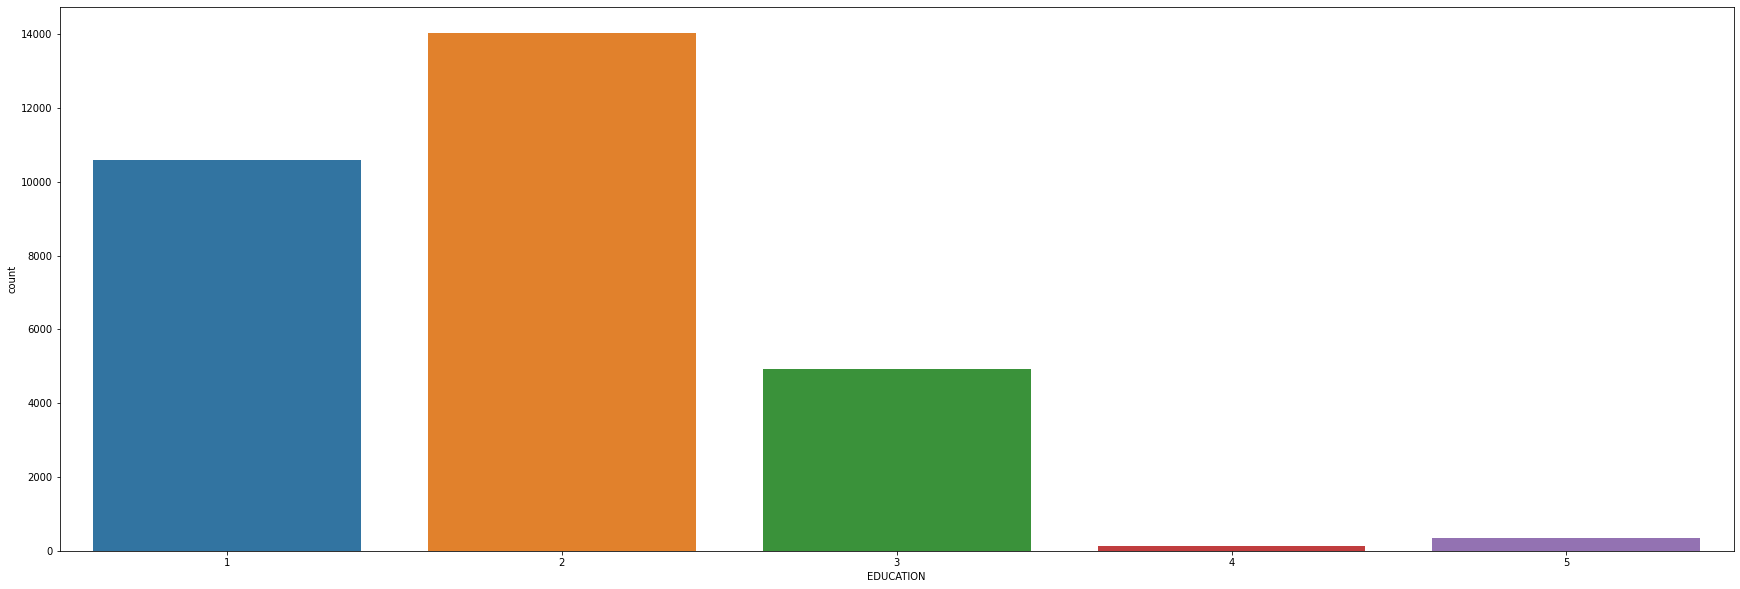

In [ ]:
# Count plot for the 'EDUCATION' column.
plt.figure(figsize=(30, 10))
sns.countplot(x="EDUCATION", data=df)
plt.show()

---

#### 4.3 The `info()` Function

Es posible que deba verificar el tipo de datos de cada columna. Entonces, en lugar de aplicar la palabra clave `dtype` una por una para cada columna, puede usar la función `info()` para verificar los tipos de datos de todas las columnas a la vez. También le indica el número total de filas y columnas en un DataFrame. Aquí está la sintaxis:
**Syntax:** `data_frame.info()`

where `data_frame` is a variable storing some Pandas DataFrame.

**Note:** This function is applicable only to Pandas DataFrame.

In [ ]:
# Check the data-types of all the columns using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

As you can see, the data-types of all the columns are now available to you at once.

---

#### 4.4 Gender of Credit Card Holders
La columna `SEXO` debe tener los siguientes dos tipos de valores en el conjunto de datos:

- `1` indica que el titular de la tarjeta de crédito es un hombre.

- `2` indica que el titular de la tarjeta de crédito es una mujer.

Si hay algún otro valor en la columna `SEXO`, elimine la fila que contiene ese valor.

Calcular el número de clientes masculinos y femeninos.

In [ ]:
# Counts of male and female clients.
female = df.loc[df["SEX"] == 2, "SEX"].shape[0]
male = df.loc[df["SEX"] == 1, "SEX"].shape[0]
print("total number of womans are", female)
print("total number of males are", male)

total number of womans are 18112
total number of males are 11888


In [ ]:
# Drop the rows containing the unwanted values. Ignore this code cell if there is/are no null or unwanted value(s).

Calcular el porcentaje de clientes masculinos y femeninos.

In [ ]:
# Percentage of male and female clients.
male_per = round(male * 100 / df.loc[df["SEX"], "SEX"].shape[0])
women_per = round(female * 100 / df.loc[df["SEX"], "SEX"].shape[0])

print(f"the percentage of male clients are {male_per}%")
print(f"the percentage of female clients are {women_per}%")

the percentage of male clients are 40%
the percentage of female clients are 60%


**P:** ¿Qué titulares de tarjetas de crédito eran hombres y mujeres?

**R:** 40

Create a count plot for the gender of clients.


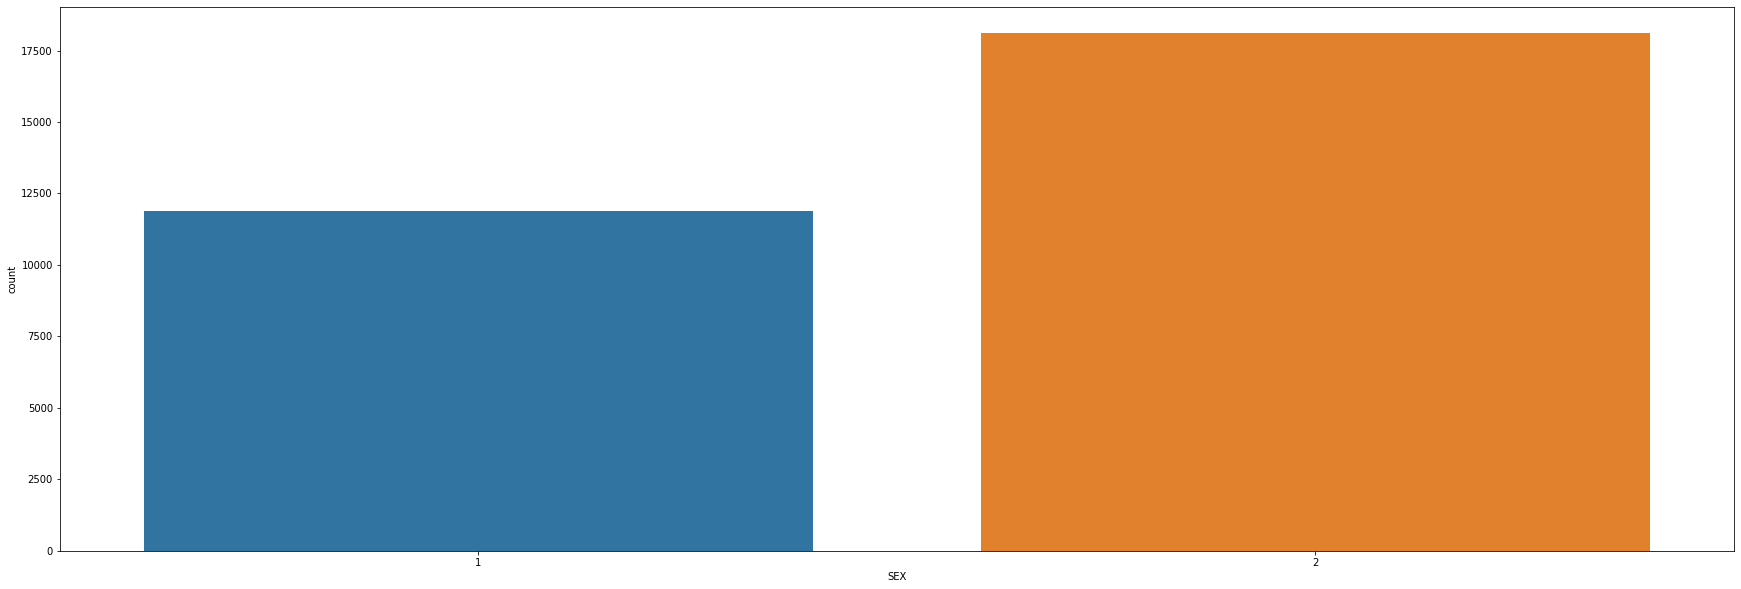

In [ ]:
# Count plot for the gender of clients.
plt.figure(figsize=(30, 10))
sns.countplot(x="SEX", data=df)
plt.show()

---

#### 4.5 Estado civil de los clientes

La columna `MATRIMONIO` contiene los siguientes tres tipos diferentes de valores:

  - `1` indica que un cliente está casado
 
  - `2` indica que un cliente es soltero
 
  - `3` indica todos los demás estados civiles posibles, como divorciado, viudo, etc.

Si hay otros valores, deben reemplazarse con `3` porque cubre todos los demás casos posibles de estado civil de un cliente.

Calcule los recuentos de cada valor en la columna `MATRIMONIO`.

In [ ]:
# Counts of each value in the 'MARRIAGE' column.
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

**P:** ¿Qué valor(es) está(n) contenido(s) en la columna `MATRIMONIO` aparte de los valores `1, 2` y `3`? ¿Cuáles son sus cuentas?

**UN:**
 

In [ ]:
# Replace the unwanted values in the 'MARRIAGE' column. Ignore if there are none.
marr_indices = df[(df['MARRIAGE'] != 1) & (df['MARRIAGE'] != 2) & (df['MARRIAGE'] != 3)].index
df.loc[marr_indices, 'MARRIAGE'] = 3

Calculate the percentage of the values in the `MARRIAGE` column.

In [ ]:
# Percentage of the values in the 'MARRIAGE' column.
married_per = round(df[df['MARRIAGE'] == 1].shape[0] * 100 / df['MARRIAGE'].shape[0])
single_per = round(df[df['MARRIAGE'] == 2].shape[0] * 100 / df['MARRIAGE'].shape[0])
other_per = round(df[df['MARRIAGE'] == 3].shape[0] * 100 / df['MARRIAGE'].shape[0])

print(f"the % of people who are married are {married_per}%")
print(f"the % of people who are single are {single_per}%")
print(f"the % of other people {other_per}%")

the % of people who are married are 46%
the % of people who are single are 53%
the % of other people 1%


**Q:** What  of clients were married?

**A:** 46

Create a count plot for the `MARRIAGE` column.

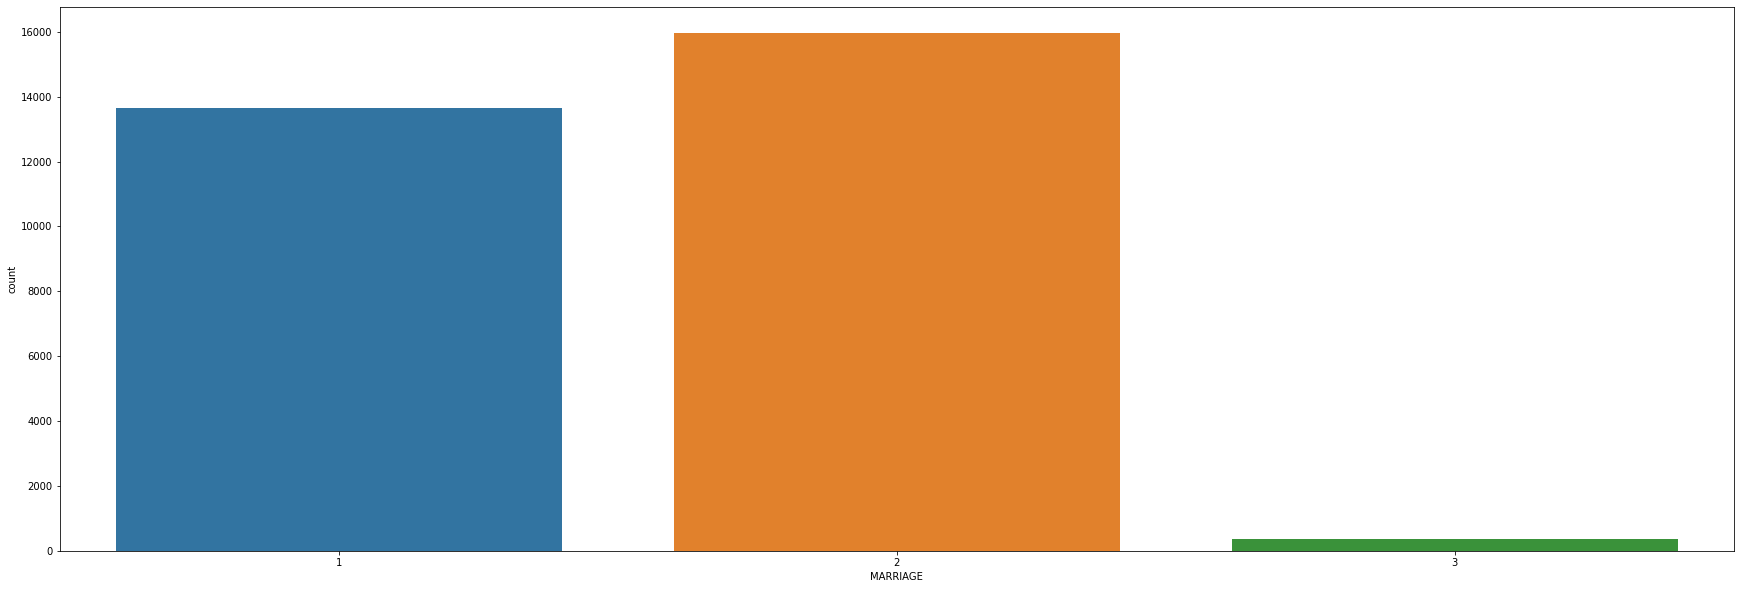

In [ ]:
# Count plot for the 'MARRIAGE' column.
plt.figure(figsize=(30, 10))
sns.countplot(x='MARRIAGE', data=df)
plt.show()

---

#### 4.6 Estado de reembolso de los clientes

Las columnas `PAY_0` a `PAY_6` tienen los siguientes tipos de valores:

- `-1` indica que el pago no vence

- `1` indica que el pago se retrasa un mes

- `2` indica que el pago se retrasa dos meses

   $\puntos$

- `8` indica que el pago se retrasa ocho meses

- `9` indica que el pago se retrasa nueve meses o más

Debe reemplazar todos los valores negativos en las columnas `PAY_0` a `PAY_6` con `0`, donde `0` denota todos los pagos realizados debidamente.

Calcule las cuentas para el estado de pago en septiembre de 2005.

In [ ]:
# Counts for the repayment status in September 2005.
df["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
# Replace the negative values with 0. Ignore if there are none.
pay0_indices = df[df["PAY_0"] < 0].index
df.loc[pay0_indices, "PAY_0"] = 0

Calculate the percentages for the repayment status in September 2005.

In [ ]:
# Percentages for the repayment status in September 2005.
total_repayment = df["PAY_0"].shape[0]
per = round(df[df["PAY_0"] == 0].shape[0] * 100 / total_repayment)

print(f"the percent for the repayment status in September 2005 is {per}%")

the percent for the repayment status in September 2005 is 49%


Create a count plot for the repayment status in September 2005.

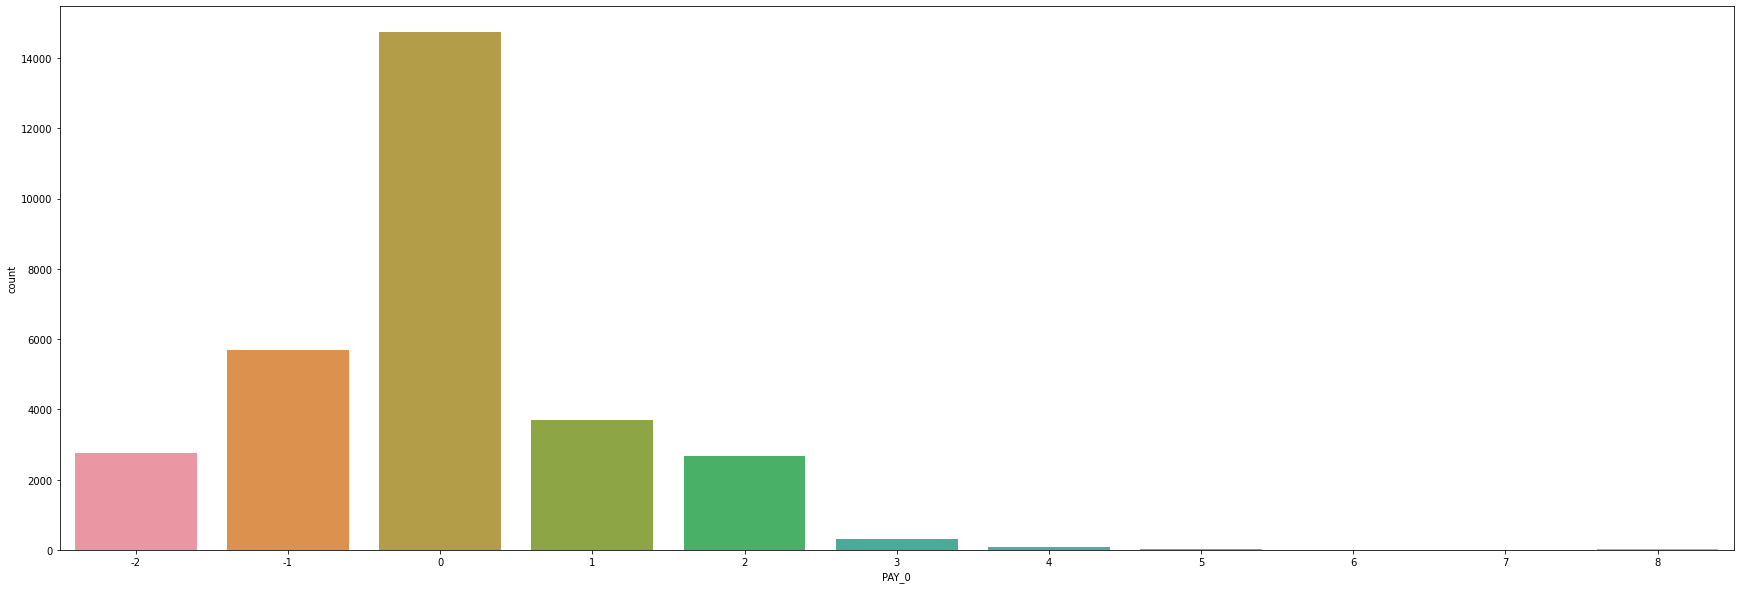

In [ ]:
# Count plot for the repayment status in September 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='PAY_0', data=df)
plt.show()

Calculate counts for the repayment status in August 2005.

In [ ]:
# Counts for the repayment status in August 2005.
df["PAY_2"].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
# Replace the negative values with 0. Ignore if there are none.
pay2_indices = df[df["PAY_2"] < 0].index
df.loc[pay2_indices, "PAY_2"] = 0

Calculate the percentages for the repayment status in August 2005.

In [ ]:
# Percentages for the repayment status in August 2005.
total_repayment = df["PAY_2"].shape[0]
per = round(df[df["PAY_2"] == 0].shape[0] * 100 / total_repayment)

print(f"the percent for the repayment status in August 2005 is {per}%")

the percent for the repayment status in August 2005 is 85%


Create a count plot for the repayment status in August 2005.

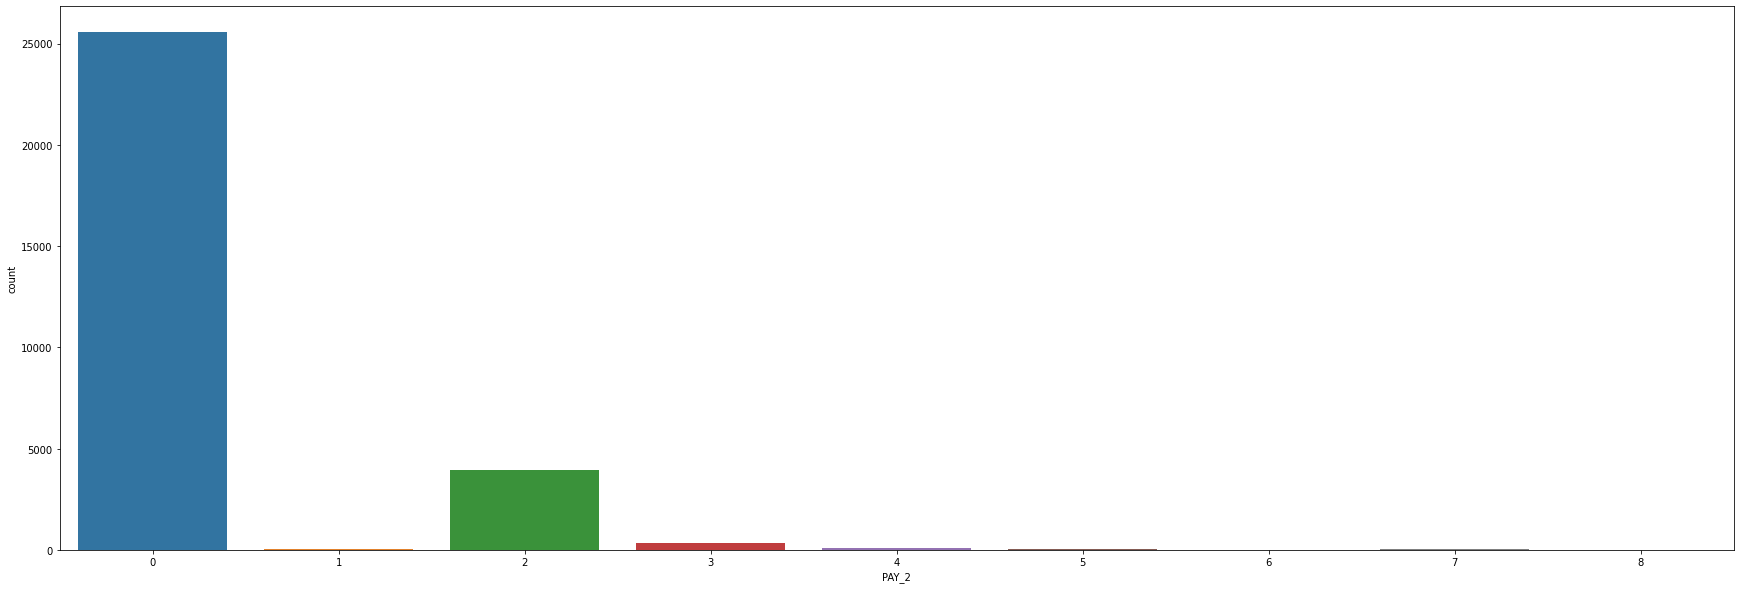

In [ ]:
# Count plot for the repayment status in August 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='PAY_2', data=df)
plt.show()

Calculate counts for the repayment status in July 2005.

In [ ]:
# Counts for the repayment status in July 2005.
df["PAY_3"].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [ ]:
# Replace the negative values with 0. Ignore if there are none.
pay3_indices = df[df["PAY_3"] < 0].index
df.loc[pay3_indices, "PAY_3"] = 0

Calculate the percentages for the repayment status in July 2005.

In [ ]:
# Percentages for the repayment status in July 2005.
total_repayment = df["PAY_3"].shape[0]
per = round(df[df["PAY_3"] == 0].shape[0] * 100 / total_repayment)

print(f"the percent for the repayment status in July 2005 is {per}%")

the percent for the repayment status in July 2005 is 86%


Create a count plot for the repayment status in August 2005.

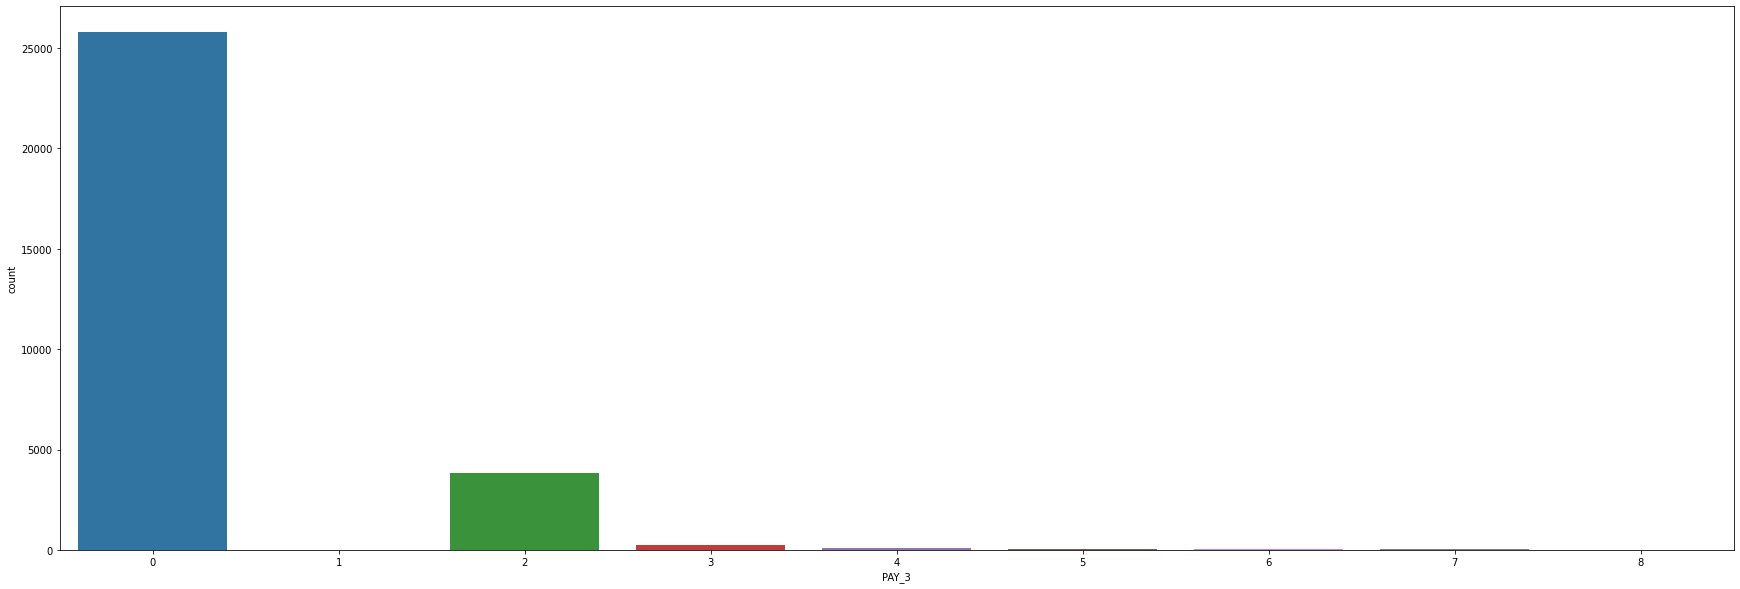

In [ ]:
# Count plot for the repayment status in July 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='PAY_3', data=df)
plt.show()

Calculate counts for the repayment status in June 2005.

In [ ]:
# Counts for the repayment status in June 2005.
df["PAY_4"].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [ ]:
# Replace the negative values with 0. Ignore if there are none.
pay4_indices = df[df["PAY_4"] < 0].index
df.loc[pay4_indices, "PAY_4"] = 0

Calculate the percentages for the repayment status in June 2005.

In [ ]:
# Percentages for the repayment status in June 2005.
total_repayment = df["PAY_4"].shape[0]
per = round(df[df["PAY_4"] == 0].shape[0] * 100 / total_repayment)

print(f"the percent for the repayment status in June 2005 is {per}%")

the percent for the repayment status in June 2005 is 88%


Create a count plot for the repayment status in June 2005.

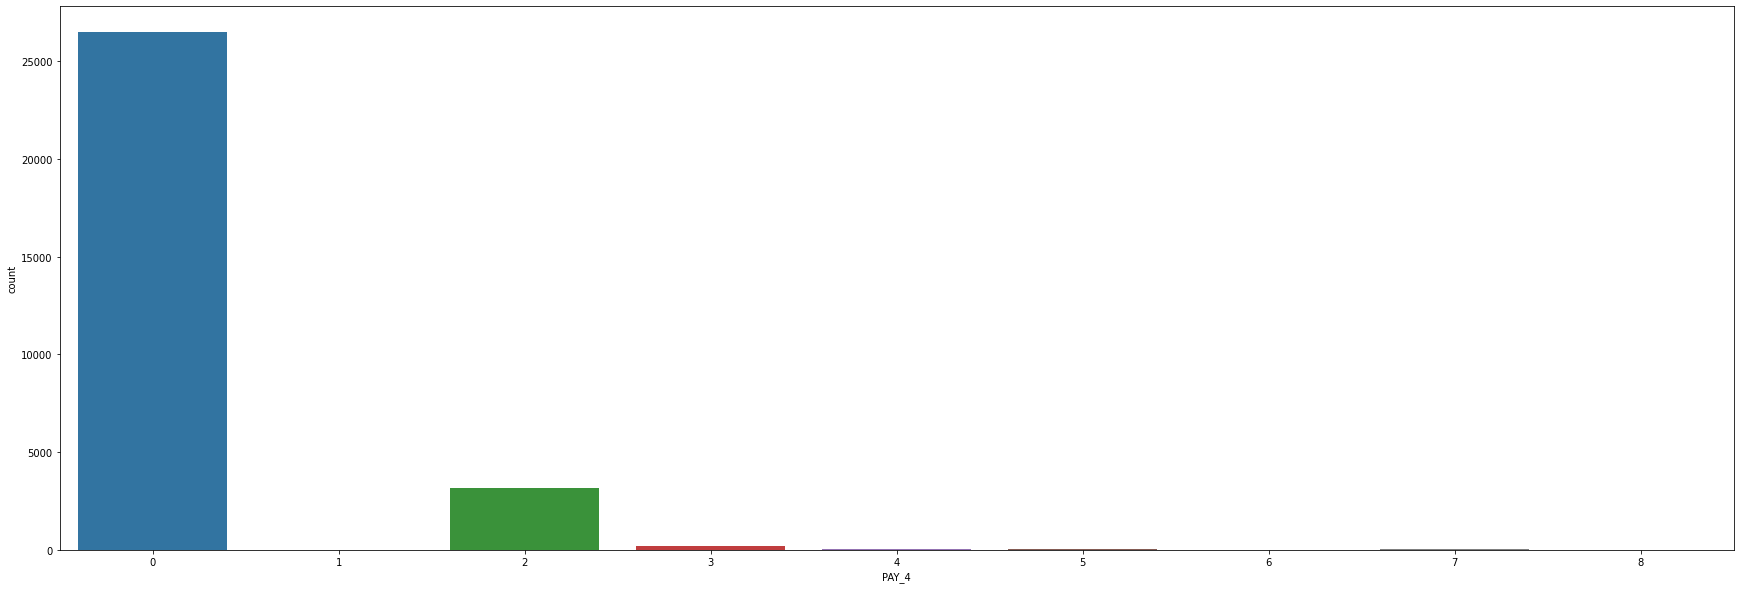

In [ ]:
# Count plot for the repayment status in June 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='PAY_4', data=df)
plt.show()

Calculate counts for the repayment status in May 2005.

In [ ]:
# Counts for the repayment status in May 2005.
df["PAY_5"].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [ ]:
# Replace the negative values with 0. Ignore if there are none.
pay5_indices = df[df["PAY_5"] < 0].index
df.loc[pay5_indices, "PAY_5"] = 0

Calculate the percentages for the repayment status in May 2005.

In [ ]:
# Percentages for the repayment status in May 2005.
total_repayment = df["PAY_5"].shape[0]
per = round(df[df["PAY_5"] == 0].shape[0] * 100 / total_repayment)

print(f"the percent for the repayment status in May 2005 is {per}%")

the percent for the repayment status in May 2005 is 90%


Create a count plot for the repayment status in May 2005.

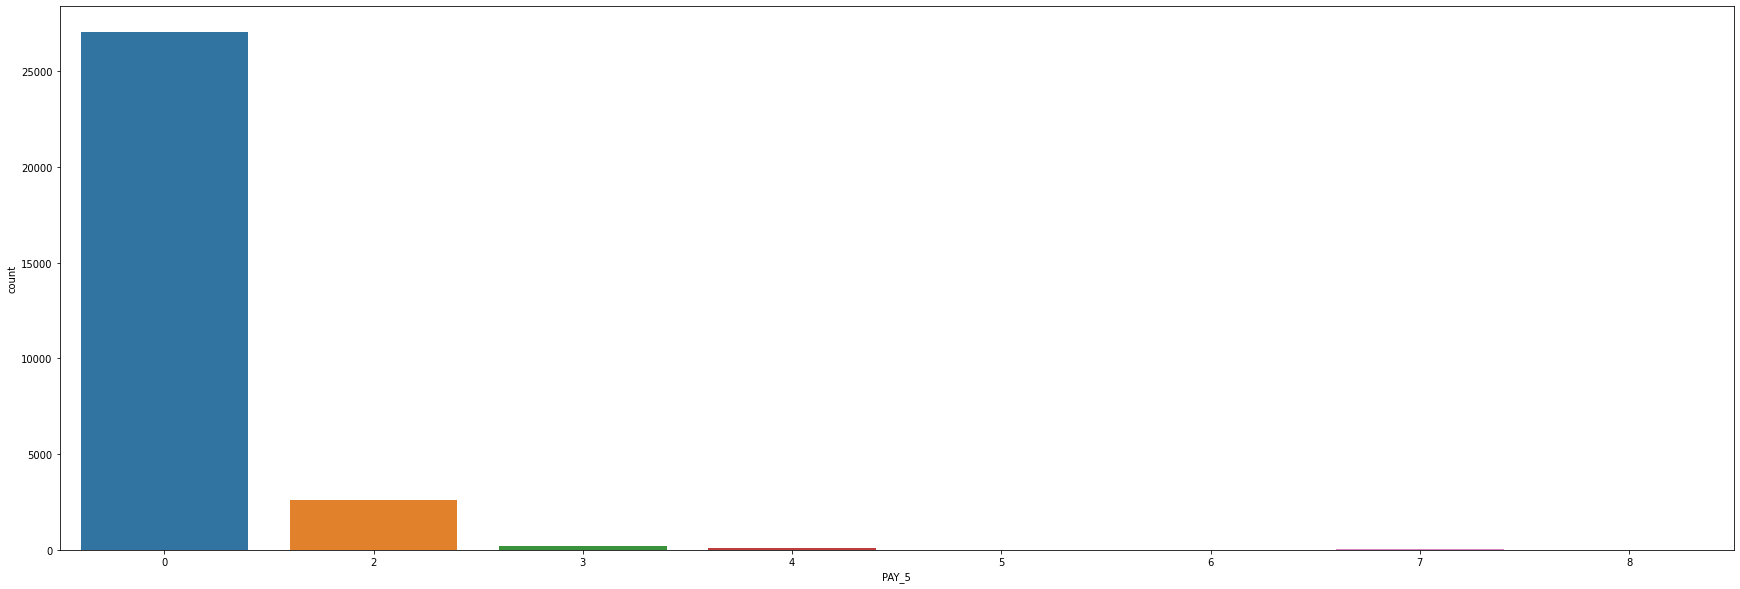

In [ ]:
# Count plot for the repayment status in May 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='PAY_5', data=df)
plt.show()

Calculate counts for the repayment status in April 2005.

In [ ]:
# Counts for the repayment status in April 2005.
df["PAY_6"].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [ ]:
# Replace the negative values with 0. Ignore if there are none.
pay6_indices = df[df["PAY_6"] < 0].index
df.loc[pay6_indices, "PAY_6"] = 0

Calculate the percentages for the repayment status in May 2005.

In [ ]:
# Percentages for the repayment status in April 2005.
total_repayment = df["PAY_6"].shape[0]
per = round(df[df["PAY_6"] == 0].shape[0] * 100 / total_repayment)

print(f"the percent for the repayment status in April 2005 is {per}%")

the percent for the repayment status in April 2005 is 90%


Create a count plot for the repayment status in April 2005.

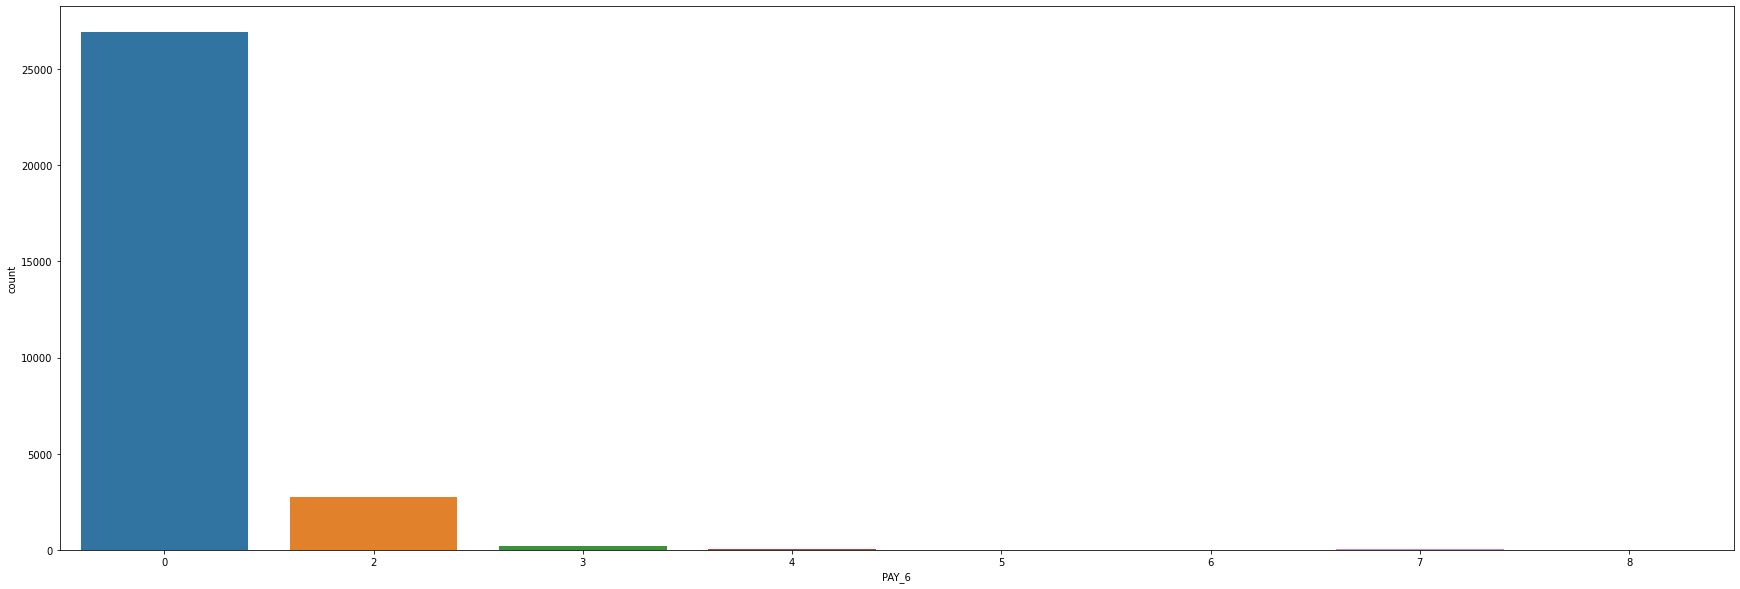

In [ ]:
# Count plot for the repayment status in April 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='PAY_6', data=df)
plt.show()

---

#### 4.6 Default Payment Status

The next column to be checked is `default.payment.next.month`. It denotes default payment status of a client in the following month (October) where

- `1` means yes the client is a defaulter i.e., they failed to make the payment due in the following month.

- `0` means no the client is NOT a defaulter i.e., they successfully made the payment due in the following month.

Any row containing any other value for this column should be removed.

Calculate counts for the default payment status in October 2005.

In [ ]:
# Counts for default payment status in October 2005.
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
# Remove the rows containing any other value apart from 0 and 1. Ignore if there are none.

Calculate the percentages for the default payment status in October 2005.

In [ ]:
# Percentages for default payment status in October 2005.
default_per = round(df[df["default.payment.next.month"] == 1].shape[0]* 100 / df["default.payment.next.month"].shape[0])
print(f"the % of defaulters are {default_per}%")

the % of defaulters are 22%


**Q:** What  of clients were defaulters?

**A:** 22

Create a count plot for the default payment status in October 2005.

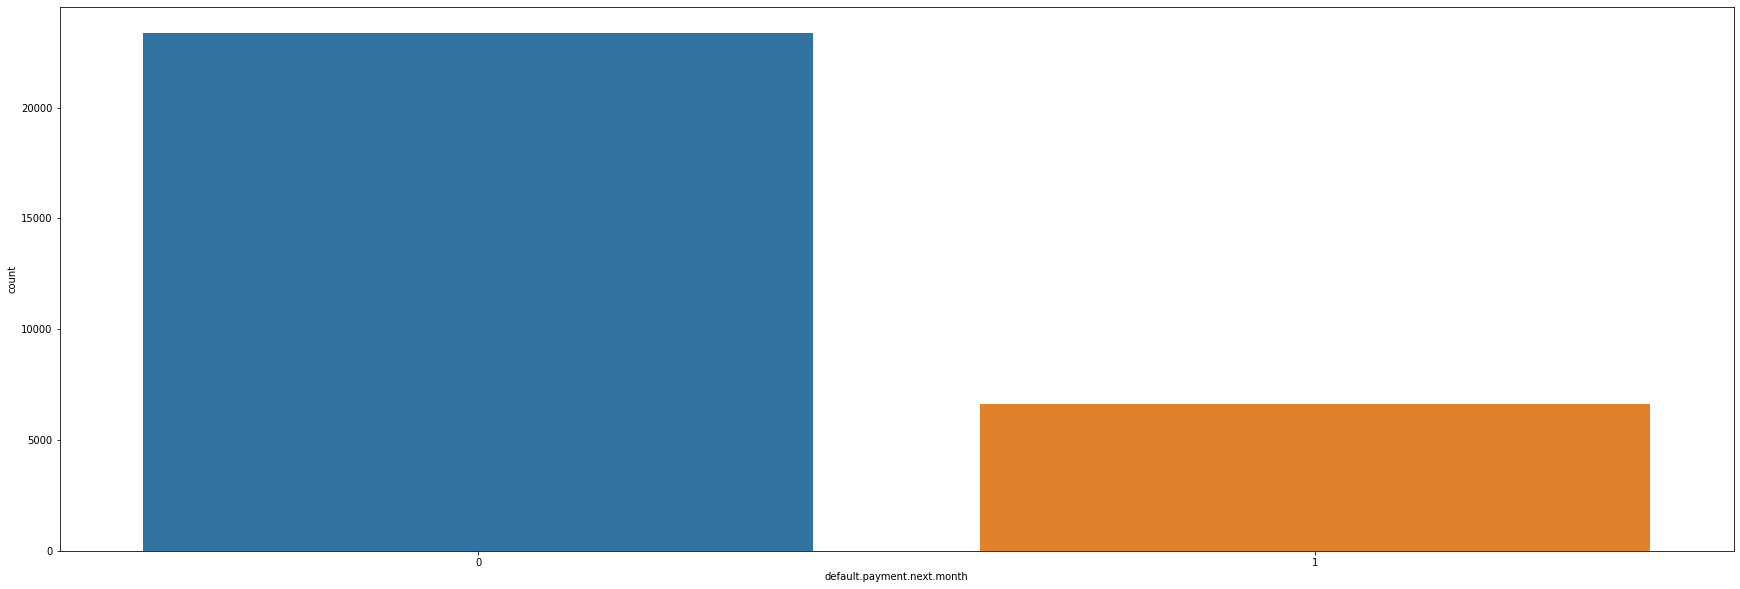

In [ ]:
# Count plot for default payment status in October 2005.
plt.figure(figsize=(30, 10))
sns.countplot(x='default.payment.next.month', data=df)
plt.show()

---

### 5. Box Plots & Histograms

The final task is to create box plots and histograms for the columns containing continuous numeric values. 

**Note:** All the histograms must have grids.

**Q:** Write down the name(s) of the column(s) containing the numeric values.

**A:** all


---

#### 5.1 Bill Statement & Previous Payment Columns

Create two Python lists:

1. Name the first one as `bill_amt_cols` containing all the column headers for the bill statement columns. 

1. Name the second one as `pay_amt_cols` containing all the column headers for the previous payment columns. 

In [ ]:
# 'bill_amt_cols' list containing all the column headers for the bill statements. 
bill_amt_cols = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
# 'pay_amt_cols' list containing all the column headers for the previous payments.
pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

Using the `for` loop, create box plots for all the bill statement columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


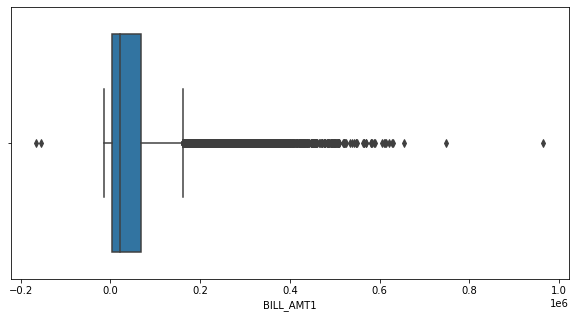

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


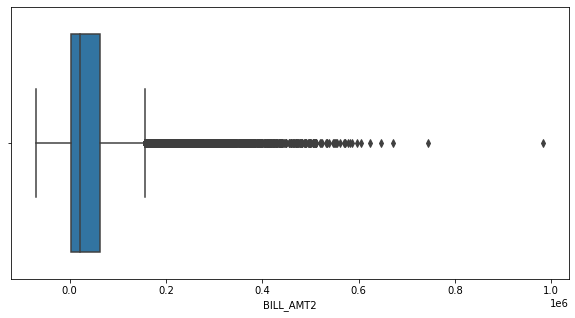

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


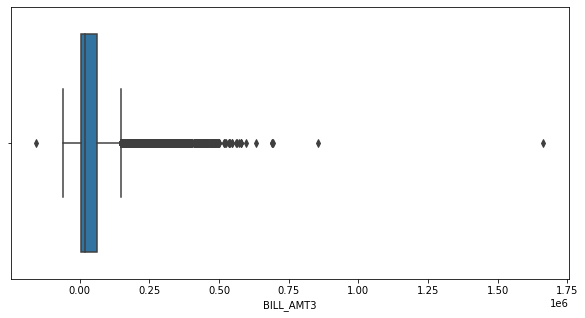

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


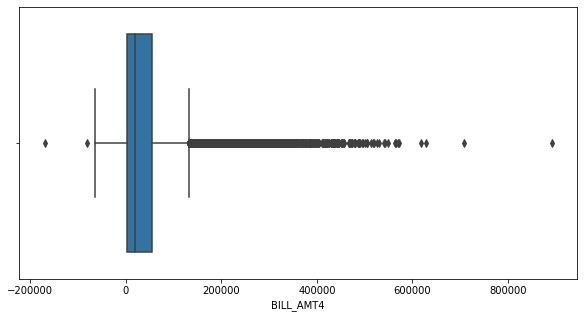

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


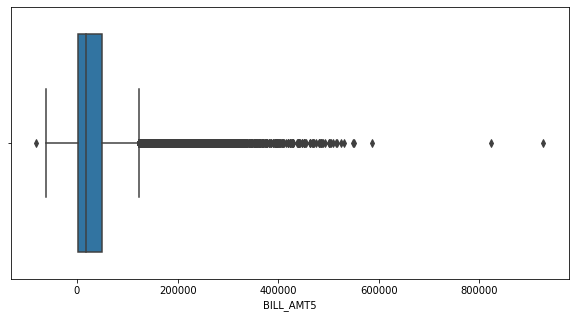

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


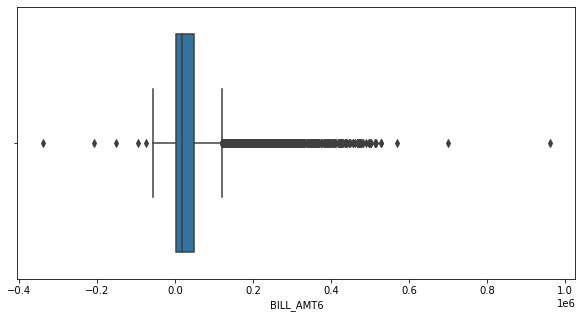

In [ ]:
# Boxplots for the bill statements.
for i in bill_amt_cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(df[i])
  plt.show()

Using the `for` loop, create box plots for all the previous payment columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


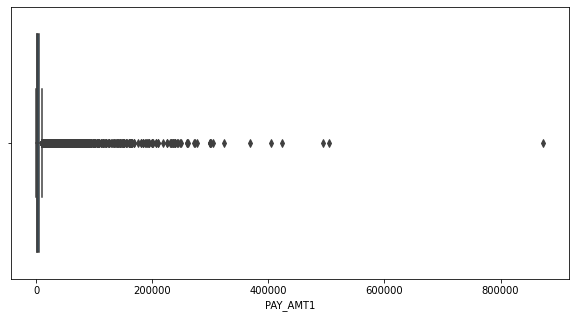

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


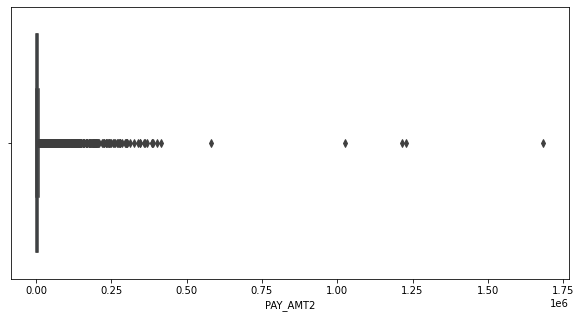

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


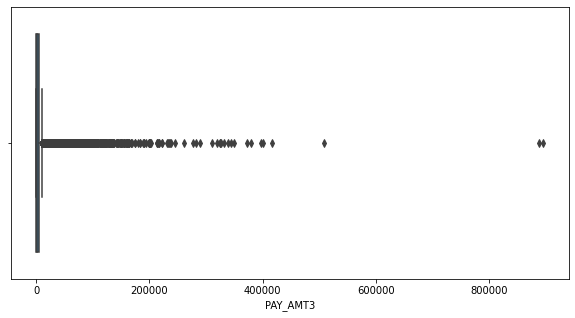

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


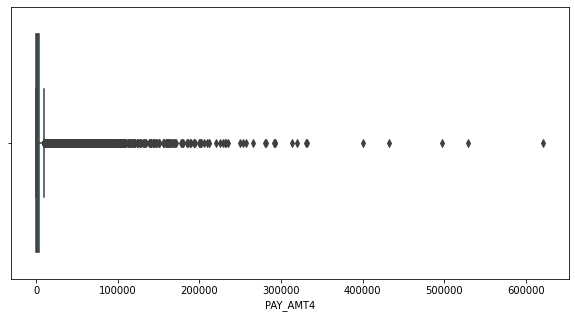

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


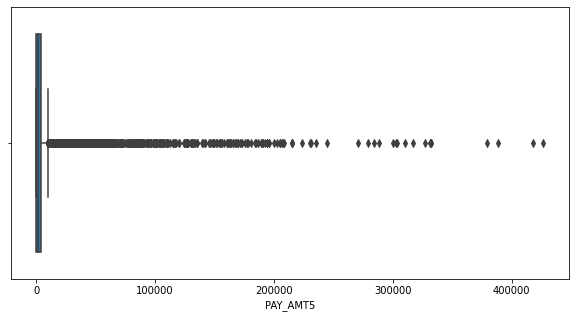

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


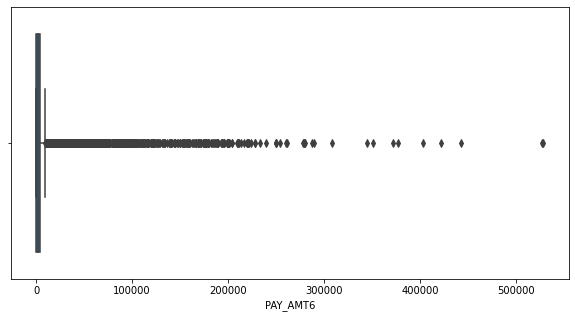

In [ ]:
# Boxplots for the previous payments.
for i in pay_amt_cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(df[i])
  plt.show()

Using the `for` loop, create histograms for all the bill statement columns.

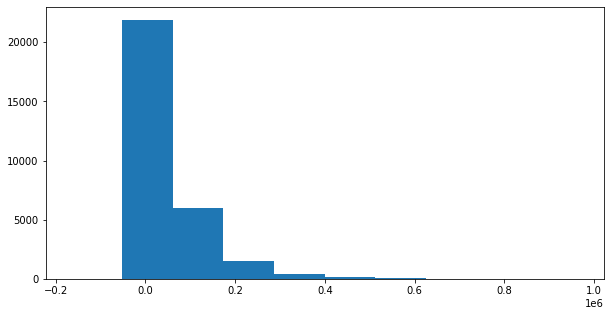

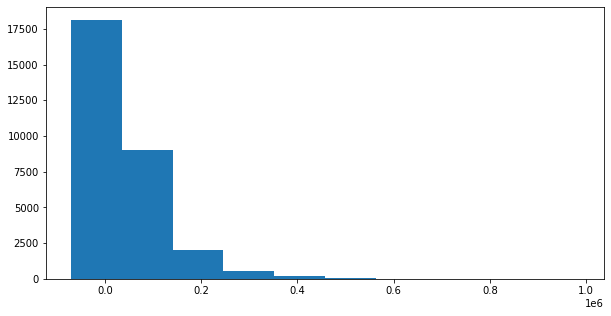

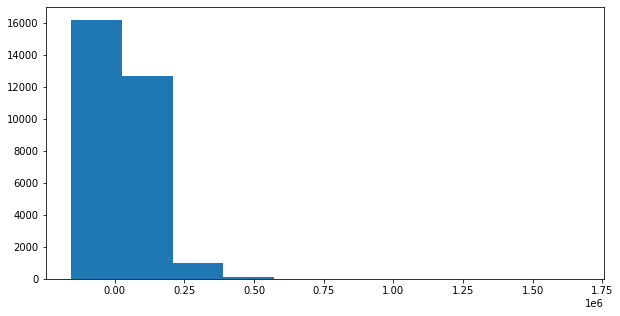

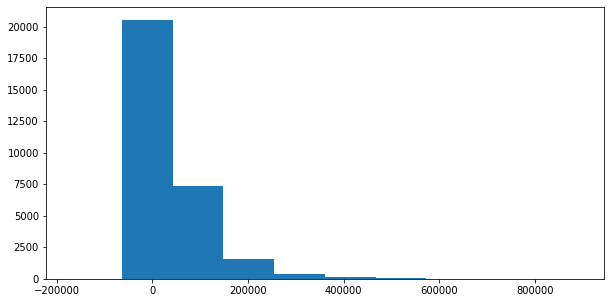

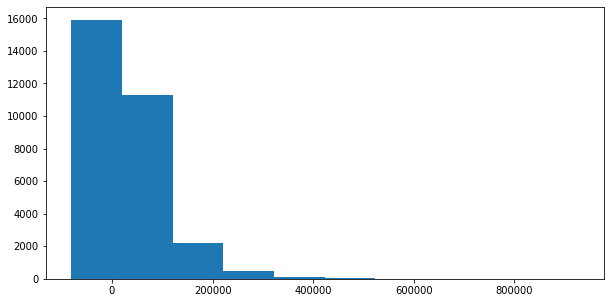

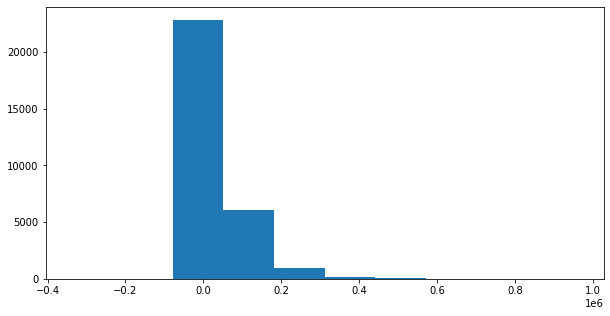

In [ ]:
# Histograms for the bill statements.
for i in bill_amt_cols:
  plt.figure(figsize=(10, 5))
  plt.hist(df[i])
  plt.show()

Using the `for` loop, create histograms for all the previous payment columns.

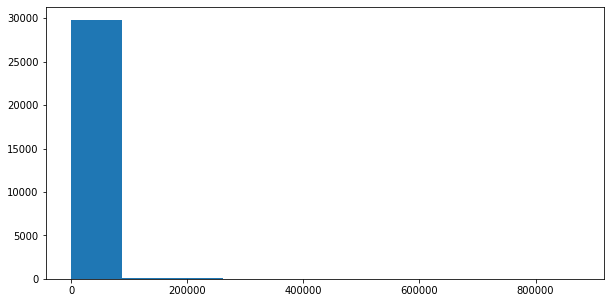

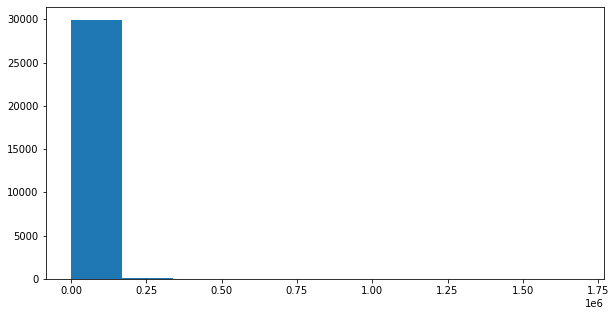

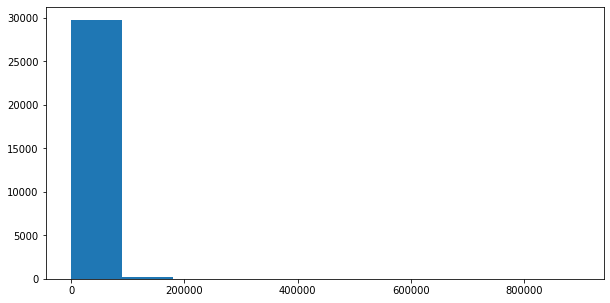

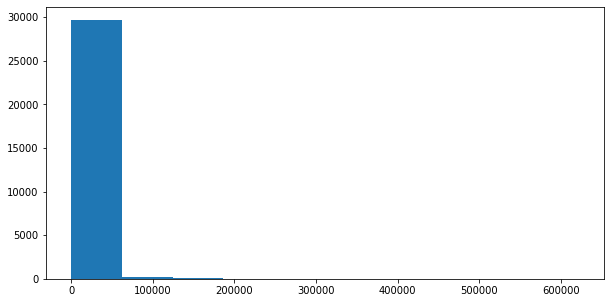

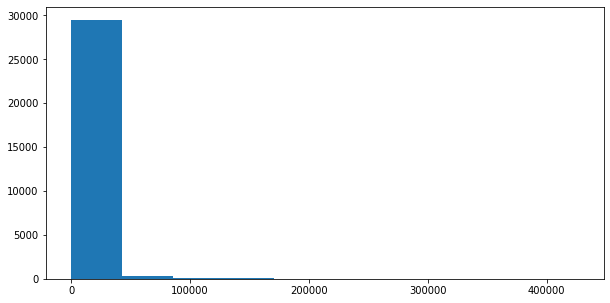

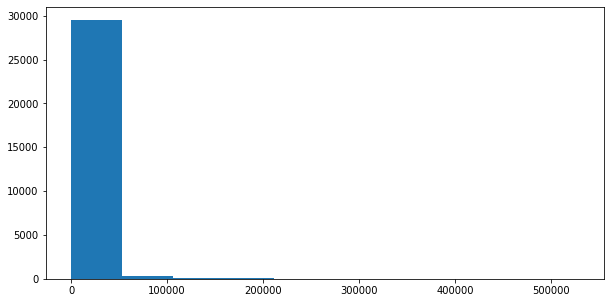

In [ ]:
# Histograms for the previous payments.
for i in pay_amt_cols:
  plt.figure(figsize=(10, 5))
  plt.hist(df[i])
  plt.show()

---

#### 5.2 Box Plot & Histogram For The `AGE` Column

Create a box plot for the `AGE` column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


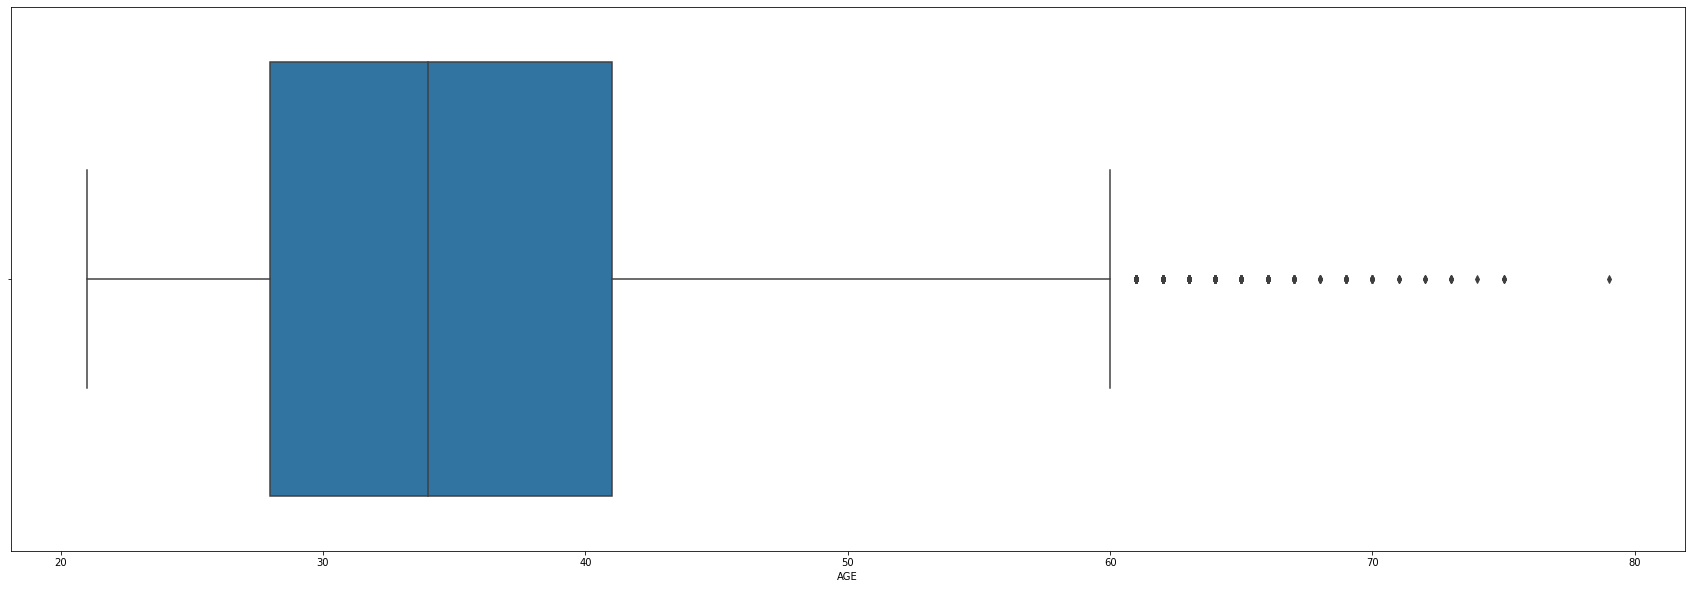

In [ ]:
# Box plot for the 'AGE' column.
plt.figure(figsize=(30,10))
sns.boxplot(df["AGE"])
plt.show()

**Q:** From the box plot for the `AGE` column, what is the approx median age of a credit card holder?

**A:** 35

Create a histogram for the `AGE` column.

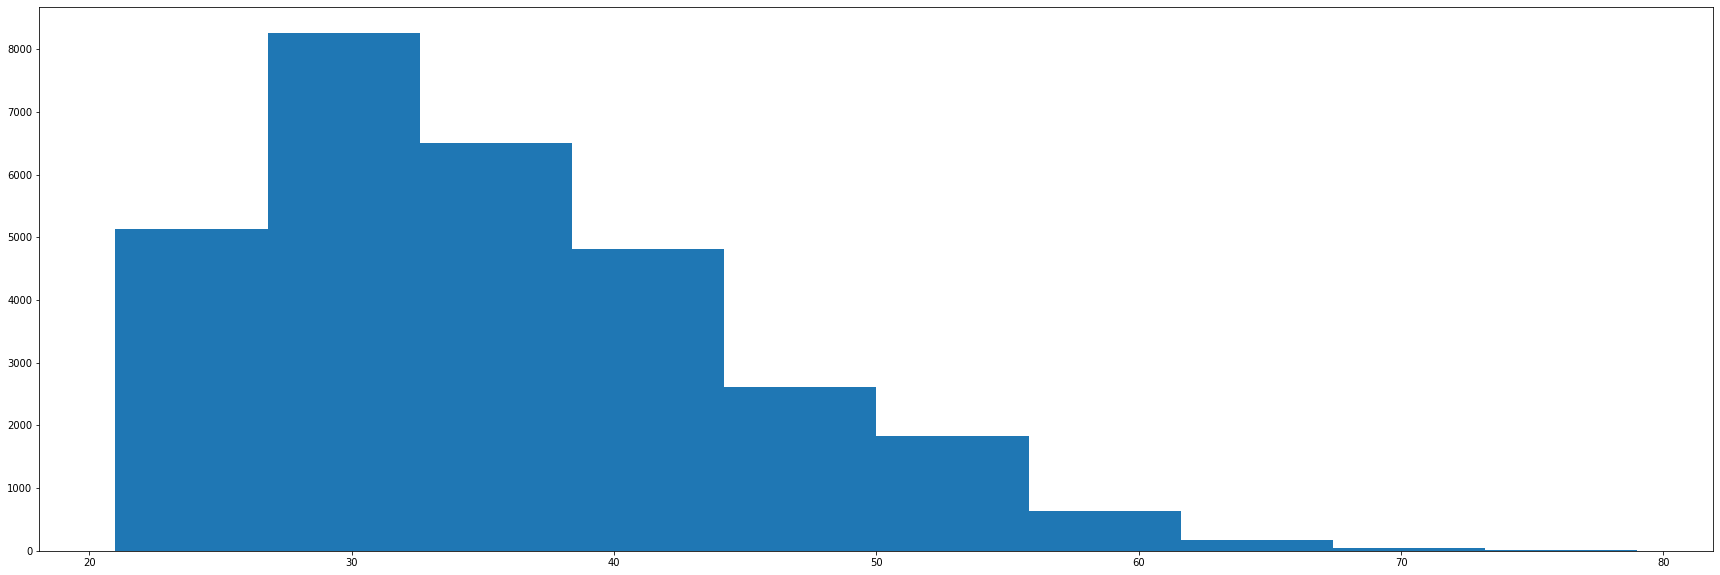

In [ ]:
# Histogram for the 'AGE' column.
plt.figure(figsize=(30,10))
plt.hist(df["AGE"])
plt.show()

**Q:** Is there some peculiar pattern in the `AGE` histogram?

**A:** yes

---

5.3 Gráfico de caja e histograma para la columna LIMIT_BAL
Cree un diagrama de caja para la columna LIMIT_BAL.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


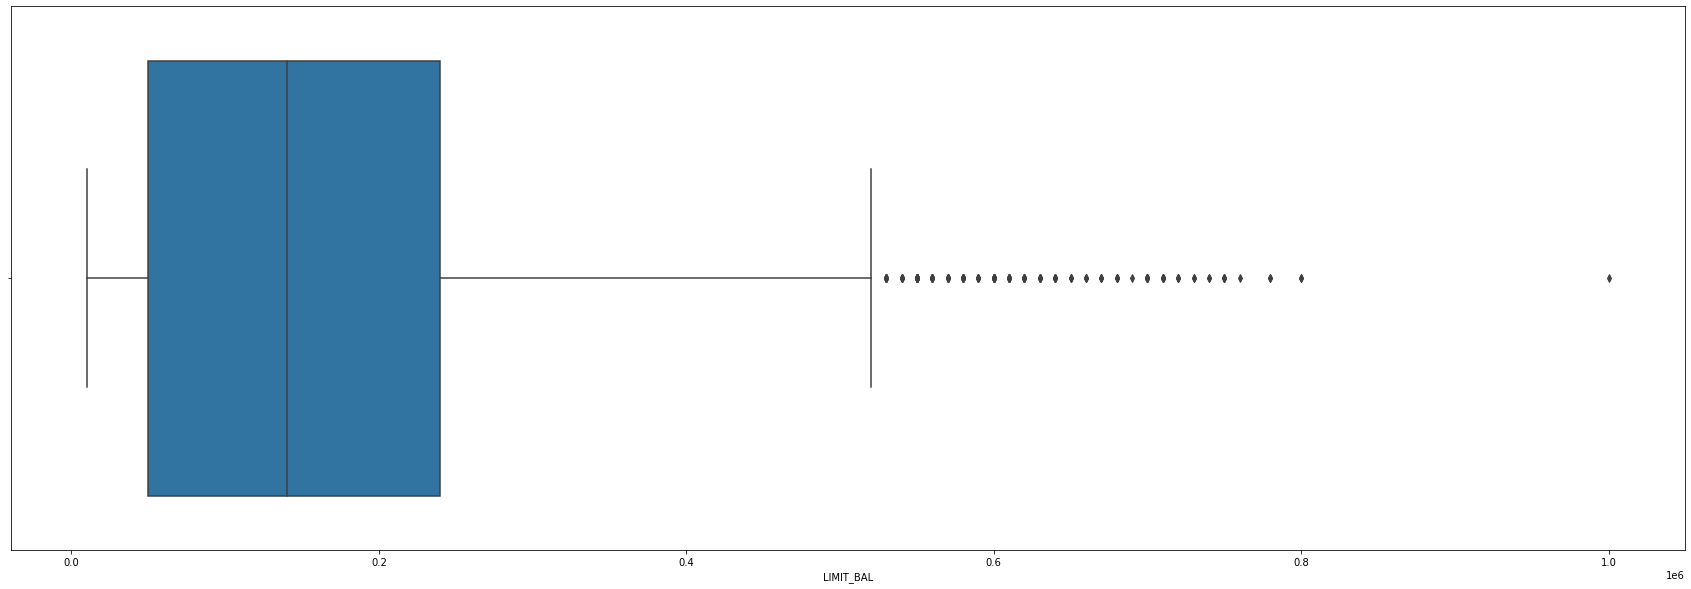

In [ ]:
# Boxplot for the LIMIT_BAL column.
plt.figure(figsize=(30,10))
sns.boxplot(df["LIMIT_BAL"])
plt.show()

Create a histogram for the `LIMIT_BAL` column using a function from the `seaborn` module.

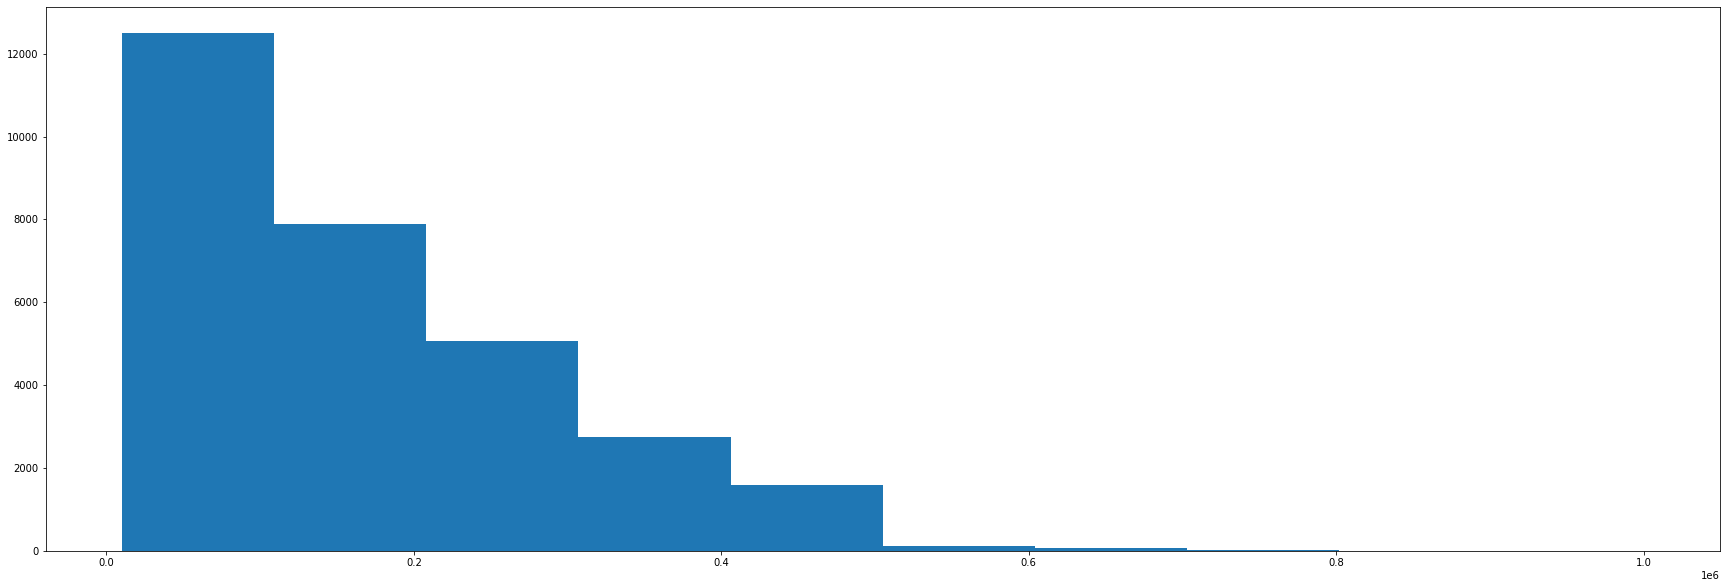

In [ ]:
# Histogram for the 'LIMIT_BAL' column using a function from the 'seaborn' module.
plt.figure(figsize=(30,10))
plt.hist(df["LIMIT_BAL"])
plt.show()

Histograma (que tiene 50 contenedores) para la columna `LIMIT_BAL` utilizando una función del módulo `matplotlib.pyplot`.

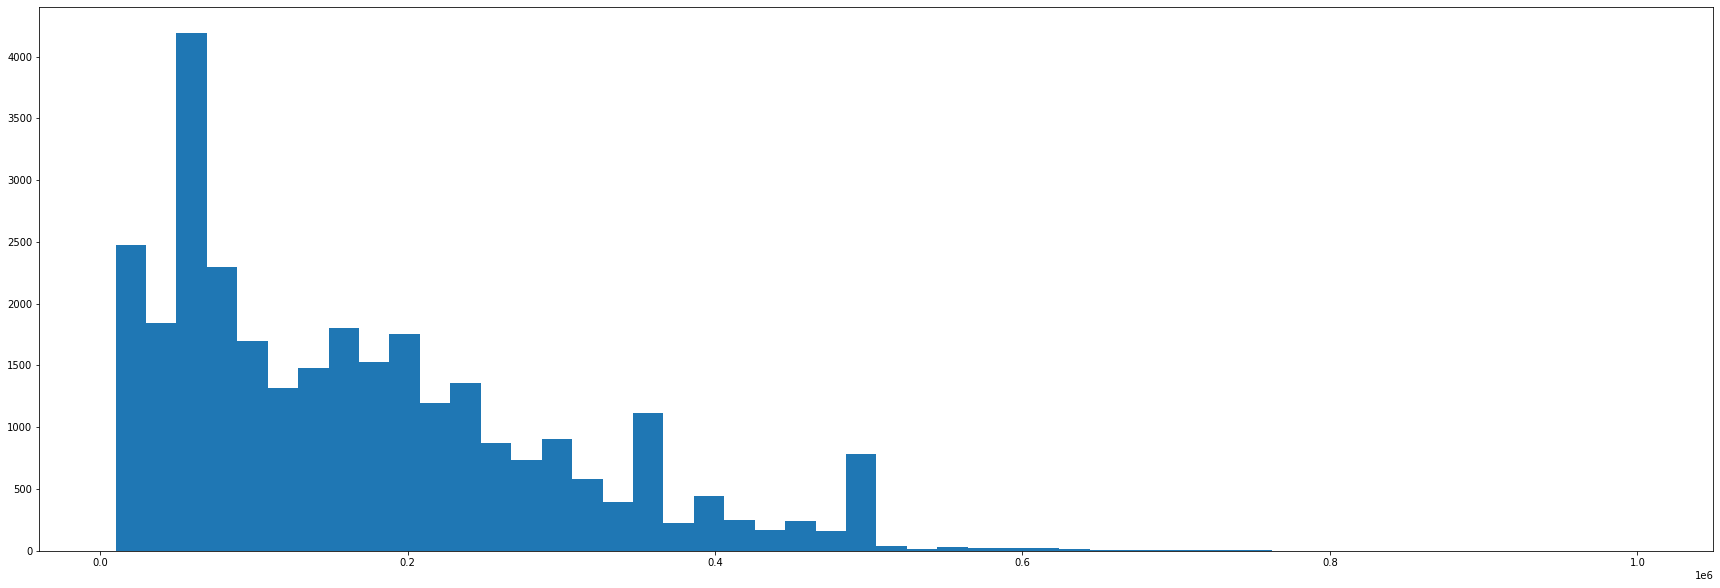

In [ ]:
# Histogram (having 50 bins) for the 'LIMIT_BAL' column using a function from the 'matplotlib.pyplot' module.
plt.figure(figsize=(30,10))
plt.hist(df["LIMIT_BAL"], bins=50)
plt.show()

P: ¿Qué sucede con los recuentos de valores LIMIT_BAL a medida que aumentan los valores LIMIT_BAL? ¿Qué significa?

---

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
defaulters = df.copy()
print(defaulters.shape)
defaulters.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853767,0.784391,1.0,1.00,2.0,2.00,5.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,0.320033,0.801727,0.0,0.00,0.0,0.00,8.0
PAY_3,30000.0,0.304067,0.790589,0.0,0.00,0.0,0.00,8.0
PAY_4,30000.0,0.258767,0.761113,0.0,0.00,0.0,0.00,8.0


Podemos ver que todas las 25 columnas tienen un recuento de 22003, lo que indica que no falta ningún valor.
podemos ver que el estado de pago se indica en las columnas PAY_0, PAY_2 ... sin columna PAY_1, por lo que cambiamos el nombre de PAY_0 a PAY_1 para facilitar la comprensión.

In [ ]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
# checking the datatype of each feature
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
defaulters.isna().sum()    # check for missing values for surity

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

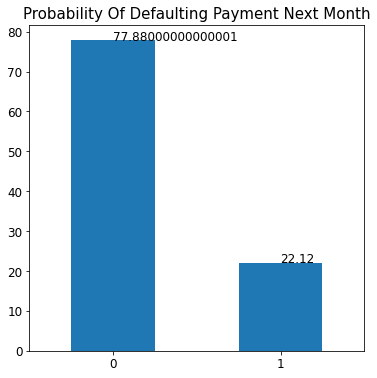

In [ ]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

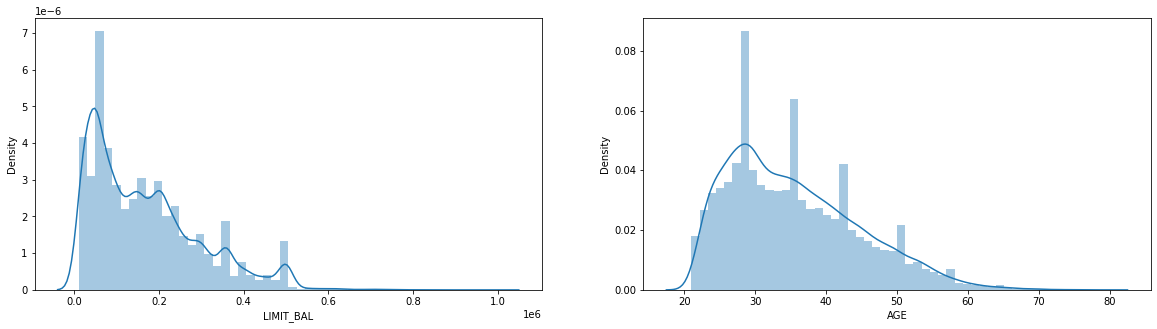

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

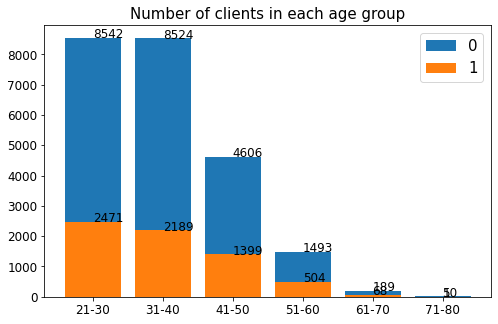

In [ ]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

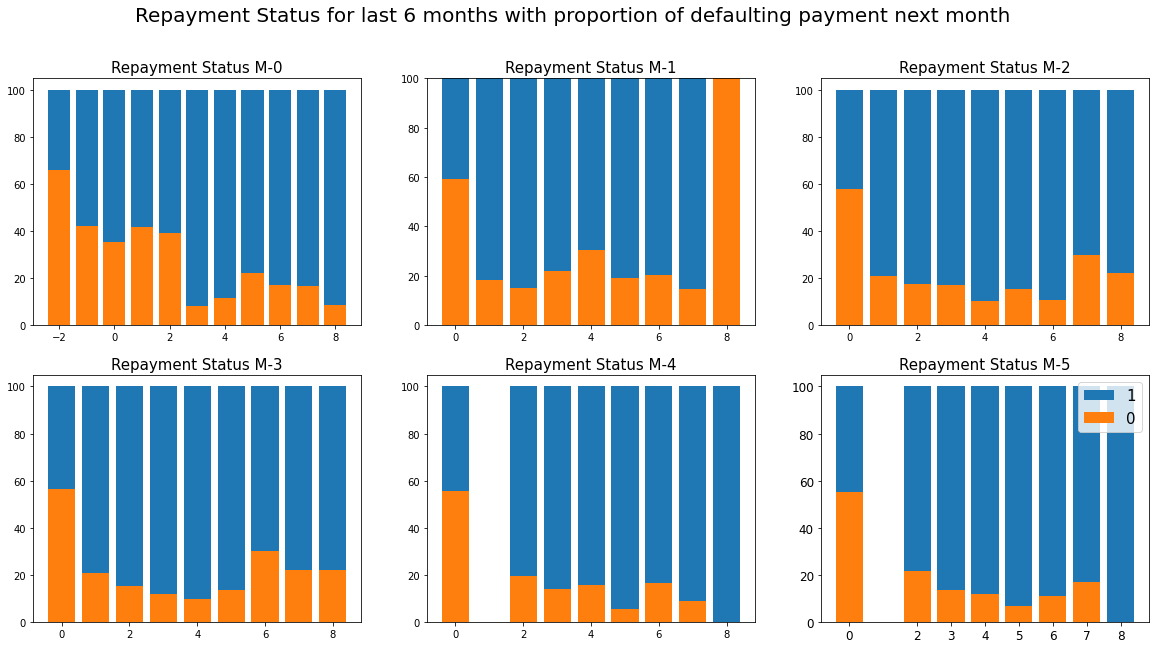

In [ ]:
plt.subplots(figsize=(20,10))

ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

El gráfico anterior nos muestra la proporción de clientes que incumplirán el pago el próximo mes según el historial de pago.
Para el estado del mes actual, cuanto antes se realice el pago, menores serán las posibilidades de que esos clientes no cumplan con el pago.

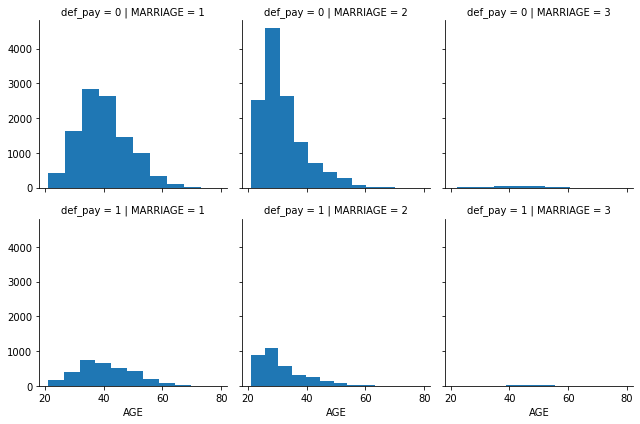

In [ ]:
g = sns.FacetGrid(defaulters, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

Del diagrama anterior podemos inferir que las personas casadas entre el rango de edad de 30 y 50 años y los clientes solteros de 20 a 30 años tienden a incumplir el pago con una mayor probabilidad de incumplimiento de pago de los clientes solteros. Por lo tanto, podemos incluir la función MATRIMONIO de los clientes para encontrar la probabilidad de incumplimiento del pago el próximo mes.

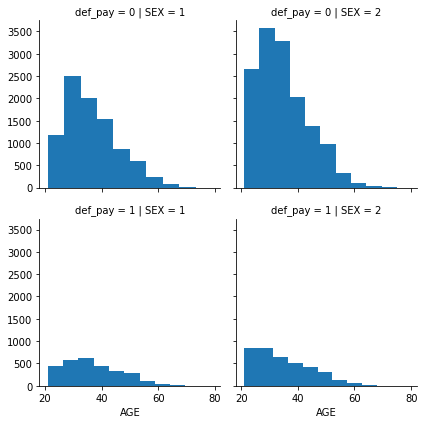

In [ ]:
g = sns.FacetGrid(defaulters, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

Se puede observar que las mujeres del grupo de edad 20-30 tienen una tendencia muy alta a la falta de pago en comparación con los hombres en todos los grupos de edad. Por lo tanto, podemos mantener la columna SEXO de clientes para predecir la probabilidad de incumplimiento de pago.

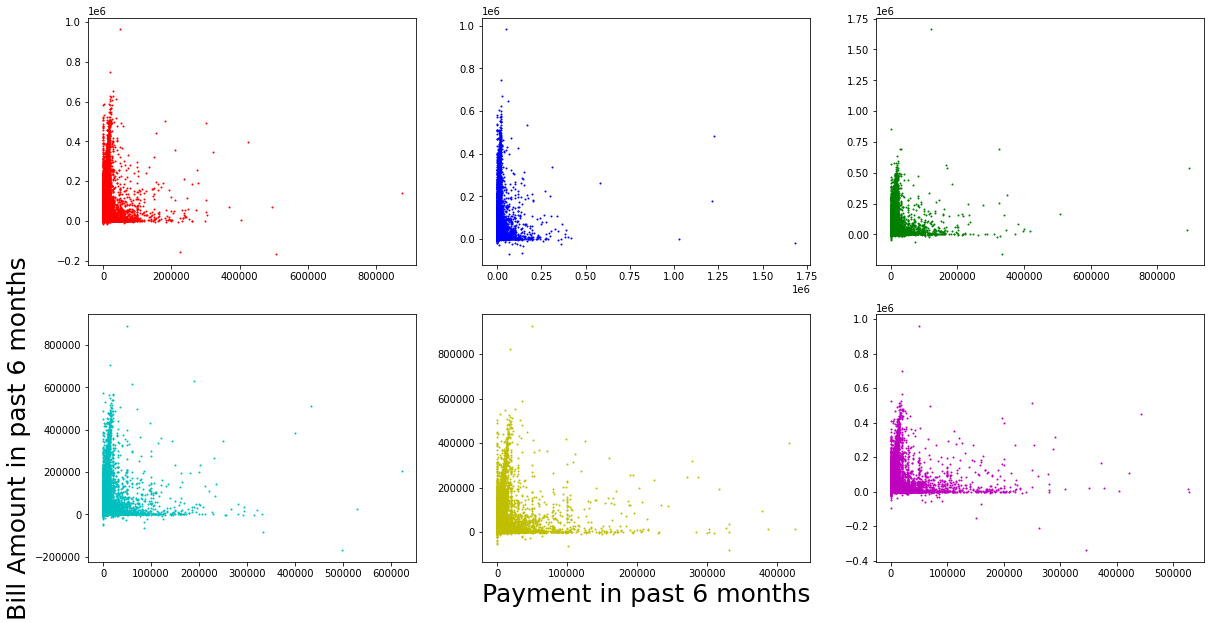

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()

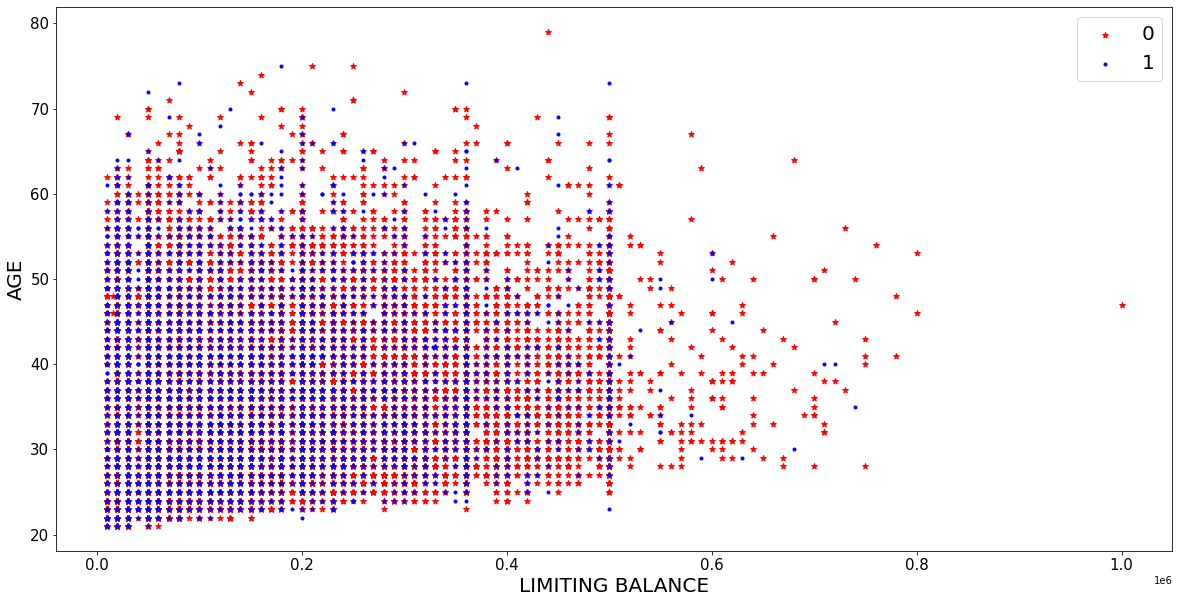

In [ ]:
y1 = defaulters.AGE[defaulters["def_pay"] == 0]
y2 = defaulters.AGE[defaulters["def_pay"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()


El gráfico anterior de la edad contra el saldo límite no proporciona ninguna información precisa, ya que existe una variación mixta de clientes de todos los grupos de edad y su saldo límite del mes actual.

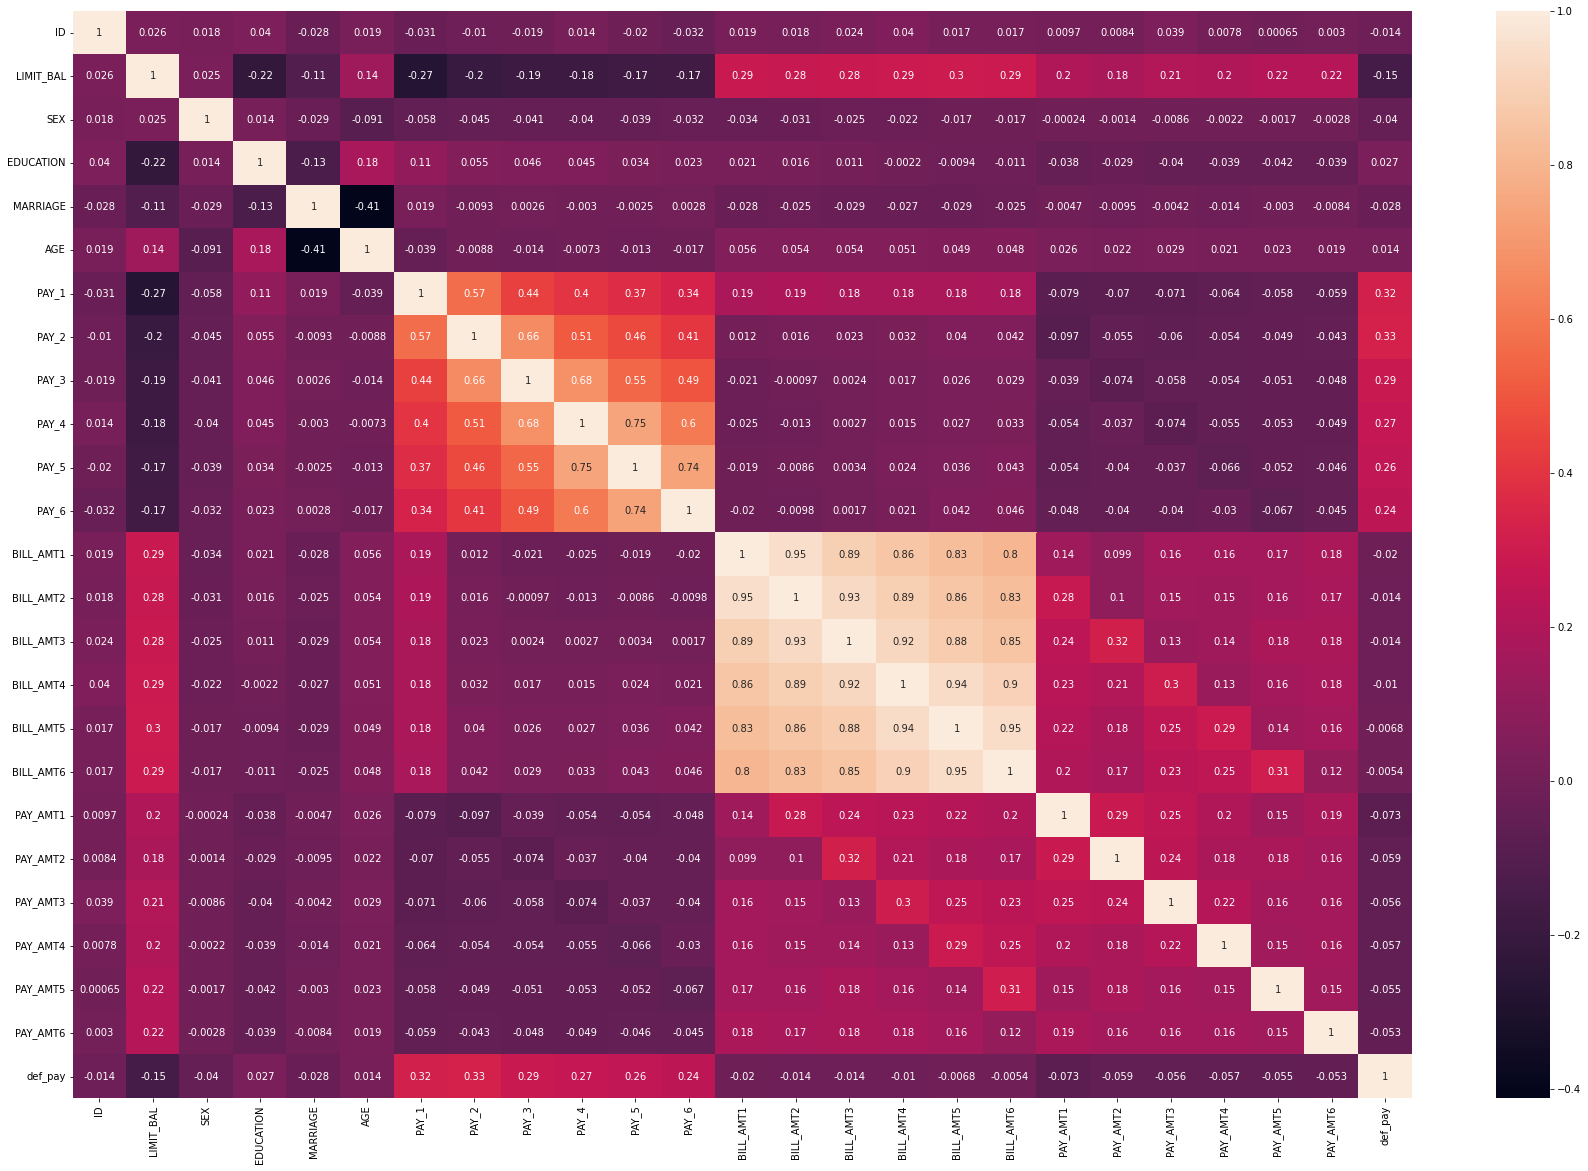

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

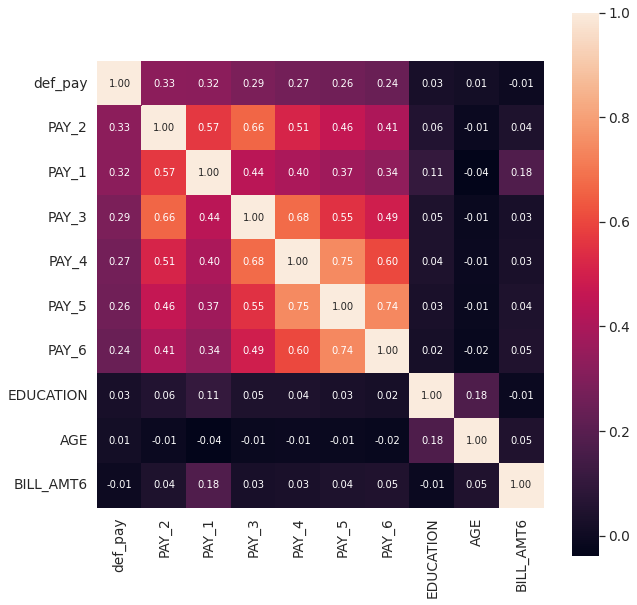

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = defaulters.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Como podemos ver, la predicción predeterminada del próximo mes depende del estado de pago de los últimos seis meses de todas las funciones que se nos brindan. Pero hay multicolinealidad entre las características del estado de pago.

Primero entrenaremos el modelo con todas las características e intentaremos reducir las características no importantes.


In [ ]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [ ]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


Podemos ver que se predice que todos los ejemplos serán negativos para el pago por defecto el próximo mes con una precisión del 77,7 %, mientras que en el conjunto de datos tenemos 980 observaciones que se espera que no paguen.
Después de realizar varios muestreos aleatorios al cambiar el parámetro random_date, encontramos que random_state=10 brinda la mayor precisión para nuestro modelo1


In [ ]:
# change the datatype of categorical features from integer to category
defaulters.SEX = defaulters.SEX.astype("category")
defaulters.EDUCATION = defaulters.EDUCATION.astype("category")
defaulters.MARRIAGE = defaulters.MARRIAGE.astype("category")
defaulters.PAY_1 = defaulters.PAY_1.astype("category")
defaulters.PAY_2 = defaulters.PAY_2.astype("category")
defaulters.PAY_3 = defaulters.PAY_3.astype("category")
defaulters.PAY_4 = defaulters.PAY_4.astype("category")
defaulters.PAY_5 = defaulters.PAY_5.astype("category")
defaulters.PAY_6 = defaulters.PAY_6.astype("category")
defaulters.def_type = defaulters.def_pay.astype("category")

In [ ]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model2:  0.7801666666666667


Incluso después de cambiar el tipo de datos de ciertas variables, no hay cambios en la precisión del modelo.

Así que evaluamos ahora eliminando las variables de multicolinealidad y manteniendo solo la variable PAY_1.

In [ ]:
df_X = defaulters.drop(['def_pay','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model3:  0.7801666666666667


As we can see even now the accuracy does not change

In [ ]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.50      0.39      0.44      3000
weighted avg       1.00      0.78      0.88      3000

[[2334  666]
 [   0    0]]

Test Accuracy Score for model4:  0.778

Train Accuracy Score for model4:  0.7788888888888889



Podemos ver que al eliminar los datos sin importancia y multicolineales, la precisión ha aumentado marginalmente en más del 2%

In [ ]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      8691
           1       0.11      0.70      0.19       309

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1781]
 [  93  216]]

Test Accuracy Score for model5:  0.7917777777777778

Train Accuracy Score for model5:  0.7920952380952381


In [ ]:
# lets rename the last column which is our target column
df['target']= df['default.payment.next.month']

In [ ]:
# selecting dependent and independent variable
X=df.drop(['ID','default.payment.next.month'],axis=1)
y=df['default.payment.next.month']

In [ ]:
X[0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred_rfc=rfc_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
rfc_score=accuracy_score(y_test,y_pred_rfc)
rfc_score

1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)
dt_score=accuracy_score(y_test,y_pred_dt)
dt_score

1.0

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_test)
svm_score=accuracy_score(y_test,y_pred_svm)
svm_score

0.7776

In [ ]:
models=['Random Forest','Decision Tree','SVM']
scores=[rfc_score,dt_score,svm_score]

In [ ]:
# making a dictionary of all models and scores
model_scores= {'models':models,'scores':scores}
model_scores

{'models': ['Random Forest', 'Decision Tree', 'SVM'],
 'scores': [1.0, 1.0, 0.7776]}

In [ ]:
# converting the dictionary into a dataframe
score_df=pd.DataFrame(model_scores)
score_df

,models,scores
0,Random Forest,1.0000
1,Decision Tree,1.0000
2,SVM,0.7776


In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

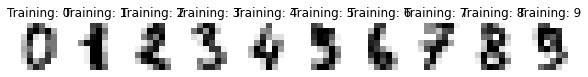

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 9))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

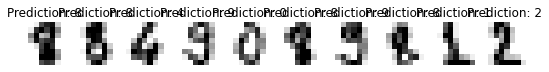

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(9, 4))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


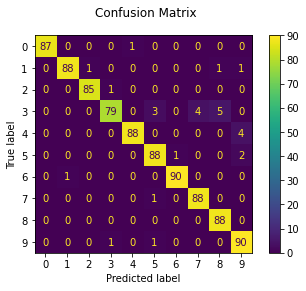

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
